# Instalação de pacotes

In [6]:
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4f2f9388cb77a4c54cdbe775ef1df81ae7e65fa3dfb00c7f4fc6c41c51d9f903
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [7]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.4 MB/s eta 0:00:00


# Importação de depedências

In [8]:
import pandas as pd
from typing import Optional

In [9]:
import hashlib
import uuid

In [10]:
from ydata_profiling import ProfileReport

In [11]:
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import get_column_plot # visualização de dados
from sdv.evaluation.single_table import get_column_pair_plot # visualização de dados pairplot
from sdv.evaluation.single_table import run_diagnostic #executa algumas verificações básicas para formato e validade de dados
from sdv.evaluation.single_table import evaluate_quality #  avlia qualidade dos dados
from sdv.io.local import CSVHandler
from sdv.metadata import Metadata

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

In [16]:
import plotly.express as px
import seaborn as sns

In [17]:
import plotly.graph_objects as go

In [18]:
from sklearn.decomposition import PCA

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Préprocessamento

In [ ]:
ds =  pd.read_csv("datsetPeqsuisaFinal.csv", encoding='utf-8',sep=",")

FileNotFoundError: [Errno 2] No such file or directory: 'datsetPeqsuisaFinal.csv'

Anonimização dos dados

In [ ]:

class GerenciadorAnonimizacao:
    def __init__(self, email: Optional[str] = None):
        """
        Inicializa o gerenciador de anonimização com um e-mail opcional.
        """
        self.email = email

    def set_email(self, email: str):
        """
        Define o e-mail a ser anonimizado.
        """
        self.email = email

    def anonimizar_uuid(self) -> Optional[str]:
        """
        Anonimiza o e-mail usando UUID (namespace DNS).
        """
        if self.email and pd.notnull(self.email):
            return str(uuid.uuid5(uuid.NAMESPACE_DNS, self.email))
        return None

    def anonimizar_sha(self) -> Optional[str]:
        """
        Anonimiza o e-mail usando SHA-256.
        """
        if self.email and pd.notnull(self.email):
            return hashlib.sha256(self.email.encode('utf-8')).hexdigest()
        return None

    @staticmethod
    def anonimizar_email_legivel(email: str) -> Optional[str]:
        """
        Anonimiza o e-mail de forma legível, preservando o domínio.
        """
        try:
            local, domain = email.split('@')
            anonymized_local = (
                local[0] + '*' * (len(local) - 2) + local[-1] if len(local) > 2 else '*' * len(local)
            )
            return anonymized_local + '@' + domain
        except:
            return email  # Retorna o dado original se não for um e-mail válido


In [ ]:
def aplicarSha(email):
    gerenciador = GerenciadorAnonimizacao(email=email)
    return gerenciador.anonimizar_sha()

def aplicarUuid(email):
    gerenciador = GerenciadorAnonimizacao(email=email)
    return gerenciador.anonimizar_uuid()

def aplicarAnonimizacaoLegivel(email):
    return GerenciadorAnonimizacao.anonimizar_email_legivel(email)



In [ ]:
# Aplicar anonimização à coluna de e-mail
opcaoAnonimizacao = "UUID"
if 'Endereço de e-mail' in ds.columns:
    match opcaoAnonimizacao:
        case "UUID":
            ds['Endereço de e-mail'] = ds['Endereço de e-mail'].apply(aplicarUuid)

        case "SHA256":
            ds['Endereço de e-mail'] = ds['Endereço de e-mail'].apply(aplicarSha)

        case "LEGIVEL":
            ds['Endereço de e-mail'] =  ds['Endereço de e-mail'].apply(aplicarAnonimizacaoLegivel)



NameError: name 'ds' is not defined

In [ ]:
ds

In [ ]:
ds.to_csv("datsetPeqsuisaAnonimizado.csv")

# Importação de datset Anonimizado

In [ ]:
dsAnonimizado = pd.read_csv("datsetPeqsuisaAnonimizado.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'datsetPeqsuisaAnonimizado.csv'

In [ ]:
dsAnonimizado.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
dsAnonimizado.info()

In [ ]:
dsAnonimizado.keys()

In [ ]:
representacao = {titulo: idx for idx, titulo in enumerate(dsAnonimizado.keys())}

In [ ]:
representacao

In [ ]:
df = dsAnonimizado.copy()

In [ ]:
df.columns = range(len(df.columns))

In [ ]:
df

In [ ]:
colunas_para_substituir = [8,9,10,11,12,13,14,15,16,17,18,40,41,42,43,44,45,46,47,48,49,50]

In [ ]:
df[colunas_para_substituir]=df[colunas_para_substituir].replace("Coluna 1",1)
df[colunas_para_substituir]= df[colunas_para_substituir].fillna(0)

In [ ]:
df

# Imputação de valores a dados faltantes

In [ ]:
#substitui idade de sexo feminino pela mediana das idades
df.loc[50,2] = 51


In [ ]:
df.groupby([3,2]).size().reset_index(name='Quantidade')

In [ ]:
df[2] = pd.to_numeric(df[2],errors='coerce')

In [ ]:
df[df[3]=='Feminino'][2].mean()

In [ ]:
df.loc[39,2] = 40

In [ ]:
valor_especifico = 'Youtube, TikTok, Whatsapp'

In [ ]:
filtro = df[df[4] == valor_especifico]

In [ ]:
filtro

In [ ]:
df.mode()

In [ ]:
def substituiMediana(ds,coluna):
    mediana = df[coluna].median()
    ds[coluna].fillna(mediana, inplace=True)

def substituiModa(ds,coluna):
    moda = df[coluna].mode()
    ds[coluna].fillna(moda, inplace=True)

In [ ]:
df[6] = df[6].fillna('Cisgênero (é o sexo que nasceu)')

In [ ]:
df

In [ ]:
df.info()

In [ ]:
representacao

In [ ]:
colunas = list(range(8,19))

In [ ]:
colunas.insert(0,0)
colunas

In [ ]:
dsAnterior = df[colunas]
dsAnterior

In [ ]:
colunas = list(range(40,51))

In [ ]:
colunas.insert(0,0)
colunas

In [ ]:
dsPosterior = df[colunas]
dsPosterior

In [ ]:
dfCensurado = pd.merge(dsAnterior,dsPosterior, on=0, how='inner')
dfCensurado

In [ ]:
# Converter apenas as colunas com tipo float para bool
for col in dfCensurado.select_dtypes(include=['float']).columns:
    dfCensurado[col] = dfCensurado[col].astype(bool)

for col in dsAnterior.select_dtypes(include=['float']).columns:
    dsAnterior[col] = dsAnterior[col].astype(bool)

for col in dsPosterior.select_dtypes(include=['float']).columns:
    dsPosterior[col] = dsPosterior[col].astype(bool)

In [ ]:
dfCensurado[50]

In [ ]:
dfCensurado

In [ ]:
 dfCensurado.info()

In [ ]:
dfCensurado_novo = pd.DataFrame()

In [ ]:
dsAnterior[8]

In [ ]:

# for col1, col2 in zip(dsAnterior.drop(0,axis=1), dsPosterior.drop(0,axis=1)):
#     print(col1, col2)
#     dfCensurado_novo[f'Fusao_{col1}_{col2}'] = dsAnterior[col1] | dsPosterior[col2]
dfCensurado_novo[f'Fusao_{8}_{50}'] = dsAnterior[8] | dsPosterior[50]
dfCensurado_novo[f'Fusao_{9}_{40}'] = dsAnterior[9] | dsPosterior[40]
dfCensurado_novo[f'Fusao_{10}_{41}'] = dsAnterior[10] | dsPosterior[41]
dfCensurado_novo[f'Fusao_{11}_{42}'] = dsAnterior[11] | dsPosterior[42]
dfCensurado_novo[f'Fusao_{12}_{43}'] = dsAnterior[12] | dsPosterior[43]
dfCensurado_novo[f'Fusao_{13}_{44}'] = dsAnterior[13] | dsPosterior[44]
dfCensurado_novo[f'Fusao_{14}_{45}'] = dsAnterior[14] | dsPosterior[45]
dfCensurado_novo[f'Fusao_{15}_{46}'] = dsAnterior[15] | dsPosterior[46]
dfCensurado_novo[f'Fusao_{16}_{47}'] = dsAnterior[16] | dsPosterior[47]
dfCensurado_novo[f'Fusao_{17}_{48}'] = dsAnterior[17] | dsPosterior[48]
dfCensurado_novo[f'Fusao_{18}_{49}'] = dsAnterior[18] | dsPosterior[49]
dfCensurado_novo

In [ ]:
dfCensurado_novo.describe()

In [ ]:
dfCensurado_novo.sum()

In [ ]:
representacao

In [ ]:
df_deduplicado = pd.concat([df[list(range(0,8))],df[list(range(19,40))],dfCensurado_novo],axis=1)
df_deduplicado.head()

In [ ]:
df_deduplicado.info()

In [ ]:
# df_deduplicado.to_csv('datasetPesquisaTratado.csv')

# EDA e perfilação

In [ ]:
representacao

In [ ]:
len(df_deduplicado.keys()),df_deduplicado.keys(),len(representacao.keys())

In [ ]:
df_deduplicado.rename(columns={

    '0': 'Carimbo de data/hora',
    '1': 'Endereço de e-mail',
    '2': 'Qual é a sua idade?',
    '3': 'Gênero',
    '4': 'Quais plataformas de mídia social você costuma usar?',
    '5': 'Cidade onde Mora',
    '6': 'Sexo',
    '7': 'Está empregado',
    '19': 'Qual sua renda mensal bruta para custo de vida',
    '20': 'Você têm religião?',
    '21': 'Qual sua religião?',
    '22': 'Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?',
    '23': 'Numa escala de 1 a 5, quão facilmente você se distrai?  (Sendo 1 pouco e 5 muito)  ',
    '24': 'Você acha difícil se concentrar nas coisas?    ',
    '25': 'Pratica esporte com que frequência mensal?',
    '26': 'Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?',
    '27': 'Com que frequência você se sente deprimido ou está deprimido?    ',
    '28': 'Com que frequência você usa mídias sociais sem um propósito específico?',
    '29': 'Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais?',
    '30': 'Como você se sente quando vê publicações de pessoas mostrando vidas aparentemente perfeitas?',
    '31': 'Como você se sente ao receber poucos "likes" em suas postagens?',
    '32': 'Você sente que o uso das redes sociais impacta seu humor de forma positiva ou negativa?',
    '33': 'Dificuldade para dormir',
    '34': 'Qual o impacto que você acredita que as redes sociais causam em você? (sendo 1 muito negativo e 5 muito positivo )',
    '35': 'Você acha que passa mais tempo nas redes sociais do que gostaria? ',
    '36': 'Como você reage quando vê comentários negativos ou críticas em suas postagens?',
    '37': 'Com que frequência você busca validação por meio de "curtidas" ou outros recursos das redes sociais?',
    '38': 'Com que frequência você usa mídias sociais sem um propósito específico? ',
    '39': 'Você já experimentou sentimentos de inveja ou inferioridade ao se comparar com outras pessoas nas redes? (Ex.: Aquele momento em que você abre a rede social do amigo e pensa dei errado para caramba)',
    '8': 'Fusao_8_50',
    '9': 'Fusao_9_40',
    '10': 'Fusao_10_41',
    '11': 'Fusao_11_42',
    '12': 'Fusao_12_43',
    '13': 'Fusao_13_44',
    '14': 'Fusao_14_45',
    '15': 'Fusao_15_46',
    '16': 'Fusao_16_47',
    '17': 'Fusao_17_48',
    '18': 'Fusao_18_49'
}, inplace=True)


In [ ]:
# df_deduplicado.to_csv("datasetPesquisaTratado_ritulosExplicitos.csv")

In [ ]:
df_deduplicado = pd.read_csv("/content/datasetPesquisaTratado_ritulosExplicitos_atualizado.csv").drop(columns=['Unnamed: 0'])

In [ ]:
df_deduplicado.keys()

Index(['Carimbo de data/hora', 'Endereço de e-mail', 'Qual é a sua idade?',
       'Gênero', 'Quais plataformas de mídia social você costuma usar?',
       'Cidade onde Mora', 'Sexo', 'Está empregado',
       'Qual sua renda mensal bruta para custo de vida', 'Você têm religião?',
       'Qual sua religião?',
       'Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?',
       'Numa escala de 1 a 5, quão facilmente você se distrai?  (Sendo 1 pouco e 5 muito)  ',
       'Você acha difícil se concentrar nas coisas?    ',
       'Pratica esporte com que frequência mensal?',
       'Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?',
       'Com que frequência você se sente deprimido ou está deprimido?    ',
       'Com que frequência você usa mídias sociais sem um propósito específico?',
       'Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais?',
  

In [ ]:
df_deduplicado.rename(columns={'Fusao_8_50':'Já foi diagnosticado por um profissional com algum dos itens: [Nenhum]',
                               'Fusao_9_40':'Já foi diagnosticado por um profissional com algum dos itens: [Depressão]',
                               'Fusao_10_41':'Já foi diagnosticado por um profissional com algum dos itens: [Ansiedade]',
                               'Fusao_11_42':'Já foi diagnosticado por um profissional com algum dos itens: [Estresse]',
                               'Fusao_12_43':'Já foi diagnosticado por um profissional com algum dos itens: [TDAH]',
                               'Fusao_13_44':'Já foi diagnosticado por um profissional com algum dos itens: [Transtorno Bipolar]',
                               'Fusao_14_45':'Já foi diagnosticado por um profissional com algum dos itens: [Transtorno de ansiedade social :]',
                               'Fusao_15_46':'Já foi diagnosticado por um profissional com algum dos itens: [Fobia de Perda de Conexão ( Ansiedade relacionada à ausência de acesso ao celular ou redes sociais, causando angústia e desconforto.]',
                               'Fusao_16_47':'Já foi diagnosticado por um profissional com algum dos itens: [Transtorno Obsessivo-Compulsivo (TOC)]',
                               'Fusao_17_48':'Já foi diagnosticado por um profissional com algum dos itens: [Transtorno de Estresse Pós-Traumático (TEPT)]',
                               'Fusao_18_49':'Já foi diagnosticado por um profissional com algum dos itens: [Dislexia]'
                               },inplace=True)

In [ ]:
df_deduplicado.to_csv("datasetPesquisaTratado_ritulosExplicitos_atualizado.csv")

In [ ]:
perfilamento = ProfileReport(df_deduplicado, title="Perfilamento e EDA")

In [ ]:
perfilamento.to_notebook_iframe()

In [ ]:
# perfilamento.to_file("Perfilamento_EDA_PesauisaSaudeMental.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Geração de Dados Sintentico com CTGAN

In [ ]:
# Identificaçã de colunas numéricas e categóricas
cols_numericas = df_deduplicado.select_dtypes(include=['float64', 'int64']).columns
cols_booleanas = df_deduplicado.select_dtypes(include=['bool']).columns
cols_categoricas = df_deduplicado.select_dtypes(include=['object', 'category']).columns


In [ ]:
df_deduplicado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 40 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                  --------------  -----  
 0   Carimbo de data/hora                                                                                                                                                                                    57 non-null     object 
 1   Endereço de e-mail                                                                                                                                                                                      57 no

## Divisão dataset

In [ ]:
X_train, X_test = train_test_split(df_deduplicado, test_size=0.2, random_state=42)

## Sintetizador e Treinamento

In [ ]:
metadata = Metadata.detect_from_dataframe(
    data= df_deduplicado  ,
    table_name='Pesquisa_impacto_saude_mental')

In [ ]:
sintetizador = CTGANSynthesizer(metadata,epochs=500) # Cria o sintetizador CTGAN com os metadados

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
sintetizador.fit(X_train )

In [ ]:
# Geracao dados sintéticos
dados_sinteticos = sintetizador.sample(2000)

In [ ]:
dados_sinteticos

Carimbo de data/hora               Endereço de e-mail  \
0     16/11/2024 08:56:56        thomasstewart@example.org   
1     16/11/2024 14:09:33     phillipslawrence@example.com   
2     16/11/2024 08:56:56             markbeck@example.net   
3     16/11/2024 08:56:56              david08@example.org   
4     16/11/2024 08:56:56              brent37@example.org   
...                   ...                              ...   
1995  16/11/2024 13:48:05         nicolemurphy@example.com   
1996  16/11/2024 18:15:24  christophercastillo@example.com   
1997  16/11/2024 08:56:56     richardcontreras@example.com   
1998  16/11/2024 11:01:40             daniel81@example.com   
1999  16/11/2024 08:56:56               paul35@example.org   

      Qual é a sua idade?     Gênero  \
0                    58.0  Masculino   
1                    41.0  Masculino   
2                    57.0   Feminino   
3                    31.0  Masculino   
4                    22.0   Feminino   
...                   ...        ...   
1995                 57.0  Masculino   
1996                 41.0  Masculino   
1997                 60.0  Masculino   
1998                 30.0  Masculino   
1999                 19.0  Masculino   

     Quais plataformas de mídia social você costuma usar? Cidade onde Mora  \
0                                         sdv-pii-ik0wi      sdv-pii-dkcsy   
1                                         sdv-pii-uerud      sdv-pii-jv900   
2                                         sdv-pii-is7x6      sdv-pii-tibiq   
3                                         sdv-pii-276ja      sdv-pii-zn9af   
4                                         sdv-pii-d6xvk      sdv-pii-hcvxi   
...                                                 ...                ...   
1995                                      sdv-pii-gcgrj      sdv-pii-5g9td   
1996                                      sdv-pii-wmtda      sdv-pii-5xjz5   
1997                                      sdv-pii-y6wws      sdv-pii-dl21h   
1998                                      sdv-pii-6u8yi      sdv-pii-jyp2o   
1999                                      sdv-pii-7xdf6      sdv-pii-u9dnf   

                                 Sexo Está empregado  \
0     Cisgênero (é o sexo que nasceu)            Sim   
1     Cisgênero (é o sexo que nasceu)            Sim   
2     Cisgênero (é o sexo que nasceu)            Sim   
3     Cisgênero (é o sexo que nasceu)            Sim   
4     Cisgênero (é o sexo que nasceu)            Sim   
...                               ...            ...   
1995  Cisgênero (é o sexo que nasceu)            Sim   
1996  Cisgênero (é o sexo que nasceu)            Sim   
1997  Cisgênero (é o sexo que nasceu)            Sim   
1998  Cisgênero (é o sexo que nasceu)            Sim   
1999  Cisgênero (é o sexo que nasceu)            Sim   

     Qual sua renda mensal bruta para custo de vida Você têm religião?  ...  \
0                                         Até 5 mil                Não  ...   
1                                         Até 3 mil                Não  ...   
2                                         Até 5 mil                Sim  ...   
3                                         Até 5 mil                Não  ...   
4                                        Atè 10 mil                Sim  ...   
...                                             ...                ...  ...   
1995                                      Até 5 mil                Sim  ...   
1996                                      Até 3 mil                Não  ...   
1997                                            NaN                Sim  ...   
1998                                      Até 5 mil                Sim  ...   
1999                                     Atè 10 mil                Sim  ...   

     Já foi diagnosticado por um profissional com algum dos itens: [Depressão]  \
0                                                  True                          
1                                                  True 

In [ ]:
df_deduplicado.select_dtypes(include=['float64', 'int64']).describe()

Qual é a sua idade?  \
count            57.000000   
mean             40.526316   
std               9.071355   
min              19.000000   
25%              34.000000   
50%              40.000000   
75%              46.000000   
max              60.000000   

       Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
count                                          56.000000                               
mean                                            3.375000                               
std                                             1.949942                               
min                                             1.000000                               
25%                                             2.000000                               
50%                                             3.000000                               
75%                                             4.000000                               
max                                            10.000000                               

       Numa escala de 1 a 5, quão facilmente você se distrai?  (Sendo 1 pouco e 5 muito)    \
count                                          56.000000                                     
mean                                            3.142857                                     
std                                             1.242118                                     
min                                             1.000000                                     
25%                                             2.000000                                     
50%                                             3.000000                                     
75%                                             4.000000                                     
max                                             5.000000                                     

       Você acha difícil se concentrar nas coisas?      \
count                                        57.000000   
mean                                          2.526316   
std                                           1.211629   
min                                           1.000000   
25%                                           1.000000   
50%                                           3.000000   
75%                                           3.000000   
max                                           5.000000   

       Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
count                                          57.000000                                                   
mean                                            2.561404                                                   
std                                             1.180459                                                   
min                                             1.000000                                                   
25%                                             2.000000                                                   
50%                                             3.000000                                                   
75%                                             3.000000                                                   
max                                             5.000000                                                   

       Com que frequência você se sente deprimido ou está deprimido?      \
count                                          56.000000                   
mean                                            1.553571                   
std                                             1.387210                   
min                                             0.000000                   
25%                                             1.000000                   
50%                                             1.000000                   
75%                                             2.000000            

In [ ]:
dados_sinteticos.select_dtypes(include=['float64', 'int64']).describe()

Qual é a sua idade?  \
count          2000.000000   
mean             43.492500   
std              13.178307   
min              19.000000   
25%              33.000000   
50%              45.000000   
75%              56.000000   
max              60.000000   

       Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
count                                        1961.000000                               
mean                                            3.164712                               
std                                             1.768459                               
min                                             1.000000                               
25%                                             1.000000                               
50%                                             3.000000                               
75%                                             4.000000                               
max                                            10.000000                               

       Numa escala de 1 a 5, quão facilmente você se distrai?  (Sendo 1 pouco e 5 muito)    \
count                                        1925.000000                                     
mean                                            3.152208                                     
std                                             1.242525                                     
min                                             1.000000                                     
25%                                             2.000000                                     
50%                                             3.000000                                     
75%                                             4.000000                                     
max                                             5.000000                                     

       Você acha difícil se concentrar nas coisas?      \
count                                      2000.000000   
mean                                          2.387000   
std                                           1.290761   
min                                           1.000000   
25%                                           1.000000   
50%                                           2.000000   
75%                                           3.000000   
max                                           5.000000   

       Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
count                                        2000.000000                                                   
mean                                            2.439000                                                   
std                                             1.205822                                                   
min                                             1.000000                                                   
25%                                             1.000000                                                   
50%                                             2.000000                                                   
75%                                             3.000000                                                   
max                                             5.000000                                                   

       Com que frequência você se sente deprimido ou está deprimido?      \
count                                        1931.000000                   
mean                                            1.162610                   
std                                             1.262644                   
min                                             0.000000                   
25%                                             0.000000                   
50%                                             1.000000                   
75%                                             2.000000            

In [ ]:
dados_sinteticos.to_csv("dataset_dados_sintéticos_2000.csv")

In [ ]:
dados_sinteticos_SemDadosDaltantes =dados_sinteticos.dropna()

In [ ]:
# dados_sinteticos_SemDadosDaltantes.to_csv("dataset_dados_sintéticos_2000_SemDadosDaltantes.csv")

## Avaliação dos dados Sintetizados

A função realiza uma avaliação abrangente que inclui os seguintes aspectos:

Coverage (Cobertura):

Verifica se os dados sintéticos abrangem todas as combinações de valores que existem nos dados reais.
Mede a proporção de dados reais cobertos pelos dados sintéticos.
Synthesis Quality (Qualidade de Síntese):

Avalia quão bem as distribuições dos dados reais e sintéticos coincidem.
Compara as distribuições marginais e condicionais entre as duas bases.
Machine Learning Efficacy (Eficácia em Aprendizado de Máquina):

Treina modelos supervisionados usando dados sintéticos e avalia o desempenho em um conjunto de teste real.
Mede se os dados sintéticos podem ser usados para criar modelos que generalizam bem nos dados reais.

### Diagnostico de aderência dos dados

Métricas Avaliadas
UNO - Data Validity Score (Validade dos Dados)

O que avlia:

Verifica se os dados sintéticos gerados atendem às restrições e validações impostas pelos metadados do dataset real.
Por exemplo:
Se valores numéricos estão dentro dos limites definidos.
Se categorias pertencem aos valores possíveis nos dados reais.
Se as colunas-chave (Ex. IDs únicos) são respeitadas.
Resultado: 100.0%

Indica que todos os registros dos dados sintéticos são válidos em relação às regras definidas no dataset original.
Não há registros que violem as restrições de tipo, limite ou categorias.

DOIS - Data Structure Score (Estrutura da Tabela)
O que avalia:

Mede a consistência estrutural entre os dados reais e sintéticos.
Verifica:
Presença de todas as colunas.
Ordem das colunas.
Tipos de dados (numéricos, categóricos, booleanos) das colunas.
Resultado: 100.0%

Indica que a estrutura da tabela sintética é idêntica à do dataset original.

TRÊS - Overall Score (Pontuação Geral)
O que avalia:

Calcula a média das duas métricas anteriores (Data Validity e Data Structure).
Reflete a fidelidade geral dos dados sintéticos em relação aos dados reais.
Resultado: 100.0%

Indica que os dados sintéticos reproduzem perfeitamente as restrições de validade e a estrutura da tabela.

In [ ]:
relatorio_diagnostico = run_diagnostic(
    real_data= df_deduplicado,
    synthetic_data= dados_sinteticos,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 40/40 [00:00<00:00, 1351.18it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 143.97it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



Interpretação e explicação
È usada para avaliar a qualidade dos dados sintéticos gerados comparando-os com os dados reais. Essa função aplica uma série de testes para identificar discrepâncias e problemas, fornecendo uma visão quantitativa sobre o quão bem os dados sintéticos replicam as características dos dados originais
Property	Description

Data Validity


Basic validity checks for each of the columns:

    Primary keys must always be unique and non-null

    Continuous values in the synthetic data must adhere to the min/max range in the real data

    Discrete values in the synthetic data must adhere to the same categories as the real data.

Structure


Checks to ensure the real and synthetic data have the same column names

referência:
https://docs.sdv.dev/sdv/single-table-data/evaluation/diagnostic


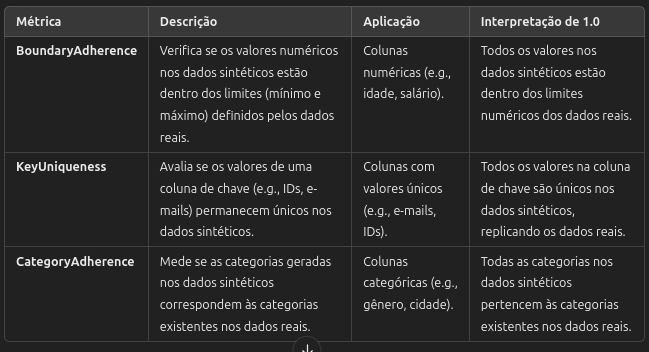


In [ ]:
relatorio_diagnostico.get_details(property_name='Data Validity') #'Data Structure' ou 'Data Validity'

Column             Metric  \
0                                Carimbo de data/hora  BoundaryAdherence   
1                                  Endereço de e-mail      KeyUniqueness   
2                                 Qual é a sua idade?  BoundaryAdherence   
3                                              Gênero  CategoryAdherence   
4                                                Sexo  CategoryAdherence   
5                                      Está empregado  CategoryAdherence   
6      Qual sua renda mensal bruta para custo de vida  CategoryAdherence   
7                                  Você têm religião?  CategoryAdherence   
8                                  Qual sua religião?  CategoryAdherence   
9   Qual é o tempo médio que você passa nas redes ...  BoundaryAdherence   
10  Numa escala de 1 a 5, quão facilmente você se ...  CategoryAdherence   
11    Você acha difícil se concentrar nas coisas?      CategoryAdherence   
12         Pratica esporte com que frequência mensal?  CategoryAdherence   
13  Com que frequência você se distrai com as rede...  CategoryAdherence   
14  Com que frequência você se sente deprimido ou ...  CategoryAdherence   
15  Com que frequência você usa mídias sociais sem...  CategoryAdherence   
16  Numa escala de 1 a 5, com que frequência você ...  CategoryAdherence   
17  Como você se sente quando vê publicações de pe...  CategoryAdherence   
18  Como você se sente ao receber poucos "likes" e...  CategoryAdherence   
19  Você sente que o uso das redes sociais impacta...  CategoryAdherence   
20                            Dificuldade para dormir  CategoryAdherence   
21  Qual o impacto que você acredita que as redes ...  CategoryAdherence   
22  Você acha que passa mais tempo nas redes socia...  CategoryAdherence   
23  Como você reage quando vê comentários negativo...  CategoryAdherence   
24  Com que frequência você busca validação por me...  CategoryAdherence   
25  Com que frequência você usa mídias sociais sem...  CategoryAdherence   
26  Você já experimentou sentimentos de inveja ou ...  CategoryAdherence   
27  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
28  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
29  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
30  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
31  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
32  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
33  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
34  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
35  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
36  Já foi diagnosticado por um profissional com a...  CategoryAdherence   
37  Já foi diagnosticado por um profissional com a...  CategoryAdherence   

    Score  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  
5     1.0  
6     1.0  
7     1.0  
8     1.0  
9     1.0  
10    1.0  
11    1.0  
12    1.0  
13    1.0  
14    1.0  
15    1.0  
16    1.0  
17    1.0  
18    1.0  
19    1.0  
20    1.0  
21    1.0  
22    1.0  
23    1.0  
24    1.0  
25    1.0  
26    1.0  
27    1.0  
28    1.0  
29    1.0  
30    1.0  
31    1.0  
32    1.0  
33    1.0  
34    1.0  
35    1.0  
36    1.0  
37    1.0

In [ ]:
relatorio_diagnostico.get_details(property_name='Data Structure')

Metric  Score
0  TableStructure    1.0

### Qualidade dos dados gerados

Sua pontuação irá variar de 0% a 100%. Esse valor informa como os dados sintéticos são semelhantes aos dados reais.

* *Uma pontuação de 100% significa que os padrões são exatamente os mesmos. Por exemplo, se você comparar os dados reais consigo mesmo (identidade), a pontuação seria de 100%.

* Uma pontuação de 0% significa que os padrões são tão diferentes quanto possível. Isso implicaria que os dados sintéticos propositadamente contêm anti-padrões que são opostos aos dados reais.

* Qualquer pontuação no meio pode ser interpretada ao longo desta escala. Por exemplo, uma pontuação de 80% significa que os dados sintéticos são cerca de 80% semelhantes aos dados reais – cerca de 80% das tendências são semelhantes.

** Referência: https://docs.sdv.dev/sdv/single-table-data/evaluation/data-quality

Descrição da Propriedade

Formas da coluna (Column Shapes)
A semelhança estatística entre os dados reais e sintéticos para colunas únicas de dados. Isso é frequentemente chamado de distribuição marginal de cada coluna.

--------------------------------------------------------------
Tendências de Par de coluna (Column Pair Trends)
A similaridade estatística entre os dados reais e sintéticos para pares de colunas. Isso é frequentemente chamado de correlação ou distribuições bivariadas das colunas.

In [ ]:
relatorio_qualidade = evaluate_quality(
    real_data= df_deduplicado,
    synthetic_data= dados_sinteticos,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 959.11it/s]|
Column Shapes Score: 90.46%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:09<00:00, 83.26it/s]| 
Column Pair Trends Score: 80.66%

Overall Score (Average): 85.56%



In [ ]:

relatorio_qualidade = evaluate_quality(
    real_data= df_deduplicado,
    synthetic_data= dados_sinteticos_SemDadosDaltantes,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 540.06it/s]|
Column Shapes Score: 90.24%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:07<00:00, 101.77it/s]|
Column Pair Trends Score: 77.44%

Overall Score (Average): 83.84%



Métricas COmo anpalisar
a. KSComplement (Kolmogorov-Smirnov Complement)
Descrição:
Mede a diferença entre as distribuições cumulativas dos dados reais e sintéticos para variáveis numéricas.
O valor é o complemento da estatística KS, ou seja, valores mais próximos de 1 indicam maior similaridade.
Interpretação do Score:
1.0: As distribuições cumulativas são idênticas.
0.0: As distribuições são completamente diferentes.
b. TVComplement (Total Variation Complement)
Descrição:
Mede a diferença entre as distribuições de probabilidade dos dados reais e sintéticos para variáveis categóricas.
O valor é o complemento da variação total, ou seja, valores mais próximos de 1 indicam maior similaridade.
Interpretação do Score:
1.0: As distribuições categóricas são idênticas.
0.0: As distribuições são completamente diferentes.


Faixa de Score	Interpretação
0.9 - 1.0	Os dados sintéticos replicam quase perfeitamente os dados reais.
0.7 - 0.9	Os dados sintéticos replicam bem os dados reais, com pequenas diferenças perceptíveis.
0.5 - 0.7	Há uma similaridade moderada entre os dados sintéticos e reais, com espaço para melhorias.
< 0.5	Os dados sintéticos diferem significativamente dos dados reais e podem ser inadequados.


In [ ]:
relatorio_qualidade.get_details(property_name='Column Shapes') #'Column Pair Trends'

Column        Metric     Score
0                                Carimbo de data/hora  KSComplement  0.530088
1                                 Qual é a sua idade?  KSComplement  0.738895
2                                              Gênero  TVComplement  0.959254
3                                                Sexo  TVComplement  0.992544
4                                      Está empregado  TVComplement  0.909386
5      Qual sua renda mensal bruta para custo de vida  TVComplement  0.877542
6                                  Você têm religião?  TVComplement  0.997507
7                                  Qual sua religião?  TVComplement  0.939272
8   Qual é o tempo médio que você passa nas redes ...  KSComplement  0.909822
9   Numa escala de 1 a 5, quão facilmente você se ...  TVComplement  0.915455
10    Você acha difícil se concentrar nas coisas?      TVComplement  0.888860
11         Pratica esporte com que frequência mensal?  TVComplement  0.902404
12  Com que frequência você se distrai com as rede...  TVComplement  0.877404
13  Com que frequência você se sente deprimido ou ...  TVComplement  0.785455
14  Com que frequência você usa mídias sociais sem...  TVComplement  0.905018
15  Numa escala de 1 a 5, com que frequência você ...  TVComplement  0.909923
16  Como você se sente quando vê publicações de pe...  TVComplement  0.920969
17  Como você se sente ao receber poucos "likes" e...  TVComplement  0.891187
18  Você sente que o uso das redes sociais impacta...  TVComplement  0.871066
19                            Dificuldade para dormir  TVComplement  0.978482
20  Qual o impacto que você acredita que as redes ...  TVComplement  0.846316
21  Você acha que passa mais tempo nas redes socia...  TVComplement  0.842921
22  Como você reage quando vê comentários negativo...  TVComplement  0.873735
23  Com que frequência você busca validação por me...  TVComplement  0.863881
24  Com que frequência você usa mídias sociais sem...  TVComplement  0.828191
25  Você já experimentou sentimentos de inveja ou ...  TVComplement  0.960675
26  Já foi diagnosticado por um profissional com a...  TVComplement  0.992228
27  Já foi diagnosticado por um profissional com a...  TVComplement  0.841026
28  Já foi diagnosticado por um profissional com a...  TVComplement  0.816289
29  Já foi diagnosticado por um profissional com a...  TVComplement  0.993105
30  Já foi diagnosticado por um profissional com a...  TVComplement  0.960219
31  Já foi diagnosticado por um profissional com a...  TVComplement  0.991544
32  Já foi diagnosticado por um profissional com a...  TVComplement  0.983588
33  Já foi diagnosticado por um profissional com a...  TVComplement  1.000000
34  Já foi diagnosticado por um profissional com a...  TVComplement  0.985588
35  Já foi diagnosticado por um profissional com a...  TVComplement  0.996544
36  Já foi diagnosticado por um profissional com a...  TVComplement  0.995456

Campos da Tabela
Column 1 e Column 2:

São os pares de colunas cujas relações estão sendo avaliadas.
Representam variáveis do dataset.
Metric:

A métrica usada para avaliar a similaridade entre as colunas.
CorrelationSimilarity:
Mede a similaridade entre as correlações lineares das colunas.
ContingencySimilarity:
Mede a similaridade das tabelas de contingência (para variáveis categóricas).
Score:

O resultado da métrica, variando entre 0.0 e 1.0.
Valores próximos de 1.0 indicam que as relações nos dados sintéticos são muito semelhantes às dos dados reais.
Real Correlation e Synthetic Correlation:

Apenas para variáveis numéricas com CorrelationSimilarity.
Mostram os valores reais e sintéticos da correlação de Pearson entre os pares de colunas.
Interpretação das Linhas
Exemplo 1:
Carimbo de data/hora e Qual é a sua idade?

Metric: CorrelationSimilarity
Score: 0.897227
Real Correlation: 0.154896
Synthetic Correlation: -0.050649
Interpretação:
A correlação entre "Carimbo de data/hora" e "Qual é a sua idade?" nos dados sintéticos não corresponde exatamente à dos dados reais (diferença nos valores de correlação).
Apesar disso, a pontuação de 0.897227 indica uma similaridade moderada/alta na estrutura de relação.
Exemplo 2:
Carimbo de data/hora e Sexo

Metric: ContingencySimilarity
Score: 0.493351
Real Correlation: NaN
Synthetic Correlation: NaN
Interpretação:
Para variáveis categóricas como "Carimbo de data/hora" e "Sexo", a similaridade de contingência é moderada (0.493351).
O modelo não conseguiu capturar completamente a relação entre essas variáveis.

Pontuação Geral
Altos Scores (> 0.9):

Relações entre as colunas nos dados sintéticos são quase idênticas às dos dados reais.
O modelo capturou bem as dependências.
Médios Scores (0.5 - 0.9):

Relações foram parcialmente capturadas, mas há discrepâncias que podem impactar a análise.
Baixos Scores (< 0.5):

Relações nos dados sintéticos são significativamente diferentes das dos dados reais, indicando limitações do modelo.

In [ ]:
relatorio_qualidade.get_details(property_name='Column Pair Trends') #

Column 1  \
0                                 Carimbo de data/hora   
1                                 Carimbo de data/hora   
2                                 Carimbo de data/hora   
3                                 Carimbo de data/hora   
4                                 Carimbo de data/hora   
..                                                 ...   
661  Já foi diagnosticado por um profissional com a...   
662  Já foi diagnosticado por um profissional com a...   
663  Já foi diagnosticado por um profissional com a...   
664  Já foi diagnosticado por um profissional com a...   
665  Já foi diagnosticado por um profissional com a...   

                                              Column 2                 Metric  \
0                                  Qual é a sua idade?  CorrelationSimilarity   
1                                               Gênero  ContingencySimilarity   
2                                                 Sexo  ContingencySimilarity   
3                                       Está empregado  ContingencySimilarity   
4       Qual sua renda mensal bruta para custo de vida  ContingencySimilarity   
..                                                 ...                    ...   
661  Já foi diagnosticado por um profissional com a...  ContingencySimilarity   
662  Já foi diagnosticado por um profissional com a...  ContingencySimilarity   
663  Já foi diagnosticado por um profissional com a...  ContingencySimilarity   
664  Já foi diagnosticado por um profissional com a...  ContingencySimilarity   
665  Já foi diagnosticado por um profissional com a...  ContingencySimilarity   

        Score  Real Correlation  Synthetic Correlation  
0    0.923657          0.154896                0.00221  
1    0.817360               NaN                    NaN  
2    0.837342               NaN                    NaN  
3    0.798991               NaN                    NaN  
4    0.632377               NaN                    NaN  
..        ...               ...                    ...  
661  0.996544               NaN                    NaN  
662  0.995456               NaN                    NaN  
663  0.982632               NaN                    NaN  
664  0.958044               NaN                    NaN  
665  0.995456               NaN                    NaN  

[666 rows x 6 columns]

In [ ]:
dados_sinteticos

Carimbo de data/hora               Endereço de e-mail  \
0     2024-11-16 08:56:56        thomasstewart@example.org   
1     2024-11-16 14:09:33     phillipslawrence@example.com   
2     2024-11-16 08:56:56             markbeck@example.net   
3     2024-11-16 08:56:56              david08@example.org   
4     2024-11-16 08:56:56              brent37@example.org   
...                   ...                              ...   
1995  2024-11-16 13:48:05         nicolemurphy@example.com   
1996  2024-11-16 18:15:24  christophercastillo@example.com   
1997  2024-11-16 08:56:56     richardcontreras@example.com   
1998  2024-11-16 11:01:40             daniel81@example.com   
1999  2024-11-16 08:56:56               paul35@example.org   

      Qual é a sua idade?     Gênero  \
0                    58.0  Masculino   
1                    41.0  Masculino   
2                    57.0   Feminino   
3                    31.0  Masculino   
4                    22.0   Feminino   
...                   ...        ...   
1995                 57.0  Masculino   
1996                 41.0  Masculino   
1997                 60.0  Masculino   
1998                 30.0  Masculino   
1999                 19.0  Masculino   

     Quais plataformas de mídia social você costuma usar? Cidade onde Mora  \
0                                         sdv-pii-ik0wi      sdv-pii-dkcsy   
1                                         sdv-pii-uerud      sdv-pii-jv900   
2                                         sdv-pii-is7x6      sdv-pii-tibiq   
3                                         sdv-pii-276ja      sdv-pii-zn9af   
4                                         sdv-pii-d6xvk      sdv-pii-hcvxi   
...                                                 ...                ...   
1995                                      sdv-pii-gcgrj      sdv-pii-5g9td   
1996                                      sdv-pii-wmtda      sdv-pii-5xjz5   
1997                                      sdv-pii-y6wws      sdv-pii-dl21h   
1998                                      sdv-pii-6u8yi      sdv-pii-jyp2o   
1999                                      sdv-pii-7xdf6      sdv-pii-u9dnf   

                                 Sexo Está empregado  \
0     Cisgênero (é o sexo que nasceu)            Sim   
1     Cisgênero (é o sexo que nasceu)            Sim   
2     Cisgênero (é o sexo que nasceu)            Sim   
3     Cisgênero (é o sexo que nasceu)            Sim   
4     Cisgênero (é o sexo que nasceu)            Sim   
...                               ...            ...   
1995  Cisgênero (é o sexo que nasceu)            Sim   
1996  Cisgênero (é o sexo que nasceu)            Sim   
1997  Cisgênero (é o sexo que nasceu)            Sim   
1998  Cisgênero (é o sexo que nasceu)            Sim   
1999  Cisgênero (é o sexo que nasceu)            Sim   

     Qual sua renda mensal bruta para custo de vida Você têm religião?  ...  \
0                                         Até 5 mil                Não  ...   
1                                         Até 3 mil                Não  ...   
2                                         Até 5 mil                Sim  ...   
3                                         Até 5 mil                Não  ...   
4                                        Atè 10 mil                Sim  ...   
...                                             ...                ...  ...   
1995                                      Até 5 mil                Sim  ...   
1996                                      Até 3 mil                Não  ...   
1997                                            NaN                Sim  ...   
1998                                      Até 5 mil                Sim  ...   
1999                                     Atè 10 mil                Sim  ...   

     Já foi diagnosticado por um profissional com algum dos itens: [Depressão]  \
0                                                  True                          
1                                                  True 

## DataViz Avaliação de dataset real vs dataset sintetico

In [ ]:
fig = get_column_plot(
    real_data= df_deduplicado,
    synthetic_data= dados_sinteticos,
    metadata=metadata,
    column_name='Qual é a sua idade?')

In [ ]:
fig.show()

In [ ]:
fig = get_column_plot(
    real_data= df_deduplicado,
    synthetic_data= dados_sinteticos,
    metadata=metadata,
    column_name='Gênero')

In [ ]:
fig.show()

### pairpolot

In [ ]:
df_deduplicado.keys()

Index(['Carimbo de data/hora', 'Endereço de e-mail', 'Qual é a sua idade?',
       'Gênero', 'Quais plataformas de mídia social você costuma usar?',
       'Cidade onde Mora', 'Sexo', 'Está empregado',
       'Qual sua renda mensal bruta para custo de vida', 'Você têm religião?',
       'Qual sua religião?',
       'Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?',
       'Numa escala de 1 a 5, quão facilmente você se distrai?  (Sendo 1 pouco e 5 muito)  ',
       'Você acha difícil se concentrar nas coisas?    ',
       'Pratica esporte com que frequência mensal?',
       'Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?',
       'Com que frequência você se sente deprimido ou está deprimido?    ',
       'Com que frequência você usa mídias sociais sem um propósito específico?',
       'Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais?',
  

In [ ]:
fig = get_column_pair_plot(
    real_data= df_deduplicado,
    synthetic_data= dados_sinteticos,
    metadata=metadata,
    column_names=['Dificuldade para dormir', 'Já foi diagnosticado por um profissional com algum dos itens: [Depressão]'],
    )

In [ ]:
fig.show()

## Subamostragem de dataset sintetico

In [ ]:
TamanhoClasse = dados_sinteticos['Gênero'].value_counts()
TamanhoClasse

Gênero
Masculino                                               1439
Feminino                                                 515
Intersexo (popularmente conhecido como Hermafrodita)      46
Name: count, dtype: int64

In [ ]:
TamanhoClasse_SemDadosDaltantes =dados_sinteticos_SemDadosDaltantes['Gênero'].value_counts()
TamanhoClasse_SemDadosDaltantes

Gênero
Masculino                                               223
Feminino                                                 94
Intersexo (popularmente conhecido como Hermafrodita)      3
Name: count, dtype: int64

In [ ]:
tamanhoParaSubAmnostragem = TamanhoClasse['Feminino']
tamanhoParaSubAmnostragem

515

In [ ]:
tamanhoParaSubAmnostragem_SemDadosDaltantes = TamanhoClasse_SemDadosDaltantes['Feminino']

In [ ]:
df_masculino = dados_sinteticos[dados_sinteticos['Gênero'] == 'Masculino'].sample(n=tamanhoParaSubAmnostragem, random_state=42)

In [ ]:
# Manter as outras classes sem alterações
df_Feminino = dados_sinteticos[dados_sinteticos['Gênero'] == 'Feminino']

In [ ]:
df_masculino_SemDadosDaltantes = dados_sinteticos_SemDadosDaltantes[dados_sinteticos_SemDadosDaltantes['Gênero'] == 'Masculino'].sample(n=tamanhoParaSubAmnostragem_SemDadosDaltantes, random_state=42)
df_Feminino_SemDadosDaltantes = dados_sinteticos_SemDadosDaltantes[dados_sinteticos_SemDadosDaltantes['Gênero'] == 'Feminino']

In [ ]:
df_balanceado = pd.concat([df_masculino, df_Feminino], axis=0).reset_index(drop=True)

In [ ]:
df_balanceado_SemDadosDaltantes = pd.concat([df_masculino_SemDadosDaltantes,
                                            df_Feminino_SemDadosDaltantes], axis=0).reset_index(drop=True)

In [ ]:
df_balanceado_SemDadosDaltantes['Gênero'].value_counts()

Gênero
Masculino    94
Feminino     94
Name: count, dtype: int64

In [ ]:
df_balanceado['Gênero'].value_counts()

Gênero
Masculino    515
Feminino     515
Name: count, dtype: int64

In [ ]:
df_balanceado

Carimbo de data/hora       Endereço de e-mail  Qual é a sua idade?  \
0     2024-11-16 21:41:01  rickeyjones@example.com                 43.0   
1     2024-11-16 08:56:56       sgreen@example.net                 58.0   
2     2024-11-16 08:56:56    anthony97@example.org                 36.0   
3     2024-11-16 21:18:12      david18@example.com                 60.0   
4     2024-11-16 08:56:56   courtney10@example.net                 29.0   
...                   ...                      ...                  ...   
1025  2024-11-16 08:56:56    natalie20@example.net                 36.0   
1026  2024-11-16 22:47:19       gcowan@example.com                 40.0   
1027  2024-11-16 08:56:56   rachelhall@example.net                 41.0   
1028  2024-11-16 22:22:32       evan12@example.net                 60.0   
1029  2024-11-16 08:56:56        don43@example.com                 21.0   

         Gênero Quais plataformas de mídia social você costuma usar?  \
0     Masculino                                      sdv-pii-s49tz     
1     Masculino                                      sdv-pii-ltqkx     
2     Masculino                                      sdv-pii-u5og1     
3     Masculino                                      sdv-pii-rn7ss     
4     Masculino                                      sdv-pii-xpunx     
...         ...                                                ...     
1025   Feminino                                      sdv-pii-v66jg     
1026   Feminino                                      sdv-pii-y1p38     
1027   Feminino                                      sdv-pii-ue9w2     
1028   Feminino                                      sdv-pii-9hwnj     
1029   Feminino                                      sdv-pii-l5qck     

     Cidade onde Mora                             Sexo Está empregado  \
0       sdv-pii-8wftn  Cisgênero (é o sexo que nasceu)            Não   
1       sdv-pii-vokfp  Cisgênero (é o sexo que nasceu)            Sim   
2       sdv-pii-rbot9  Cisgênero (é o sexo que nasceu)            Sim   
3       sdv-pii-qztag  Cisgênero (é o sexo que nasceu)            Sim   
4       sdv-pii-2ttaa  Cisgênero (é o sexo que nasceu)            Sim   
...               ...                              ...            ...   
1025    sdv-pii-y5tjv  Cisgênero (é o sexo que nasceu)            Não   
1026    sdv-pii-4djp1  Cisgênero (é o sexo que nasceu)            Não   
1027    sdv-pii-r6la2  Cisgênero (é o sexo que nasceu)            Sim   
1028    sdv-pii-mfj9z  Cisgênero (é o sexo que nasceu)            Não   
1029    sdv-pii-ou79u  Cisgênero (é o sexo que nasceu)            Sim   

     Qual sua renda mensal bruta para custo de vida Você têm religião?  ...  \
0                                         Até 5 mil                Sim  ...   
1                                         Até 3 mil                Não  ...   
2                                        Atè 10 mil                NaN  ...   
3                                        Atè 10 mil                Sim  ...   
4                                        Atè 10 mil                Sim  ...   
...                                             ...                ...  ...   
1025                                     Até 20 mil                Sim  ...   
1026                                      Até 5 mil                Sim  ...   
1027                                     Atè 10 mil                Sim  ...   
1028                                     Até 20 mil                Não  ...   
1029                                     Até 20 mil                Sim  ...   

     Já foi diagnosticado por um profissional com algum dos itens: [Depressão]  \
0                                                 False                          
1                                                 False                          
2                                                  True                          
3                                                 False                          
4  

In [ ]:
relatorio_qualidade = evaluate_quality(
    real_data= df_deduplicado,
    synthetic_data= df_balanceado,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 1217.77it/s]|
Column Shapes Score: 90.11%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:08<00:00, 93.25it/s]|
Column Pair Trends Score: 80.13%

Overall Score (Average): 85.12%



In [ ]:
relatorio_qualidade = evaluate_quality(
    real_data= dados_sinteticos,
    synthetic_data= df_balanceado,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 559.31it/s]|
Column Shapes Score: 98.26%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:09<00:00, 85.45it/s]| 
Column Pair Trends Score: 96.25%

Overall Score (Average): 97.25%



In [ ]:
relatorio_qualidade = evaluate_quality(
    real_data= df_deduplicado,
    synthetic_data= df_balanceado_SemDadosDaltantes,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 435.39it/s]|
Column Shapes Score: 88.88%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:07<00:00, 110.72it/s]|
Column Pair Trends Score: 75.68%

Overall Score (Average): 82.28%



In [ ]:
# df_balanceado.to_csv('df_balanceado_subamostrado_pesquisa_1030_elementos.csv', index=False)

In [ ]:
# df_balanceado_SemDadosDaltantes.to_csv('df_balanceado_subamostrado_pesquisa_94_elementos_SemDadosDaltantes.csv', index=False)

## Carregamento de Dataset

In [77]:
df_balanceado = pd.read_csv('/content/df_balanceado_subamostrado_pesquisa_94_elementos_SemDadosDaltantes.csv')

In [78]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 40 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                  --------------  -----  
 0   Carimbo de data/hora                                                                                                                                                                                    188 non-null    object 
 1   Endereço de e-mail                                                                                                                                                                                      188

In [81]:
df_selecao_mineracao_insights = df_balanceado.iloc[:,[2,3,7,8,9,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28]]
df_selecao_mineracao_insights.head()

Qual é a sua idade?     Gênero Está empregado  \
0                 38.0  Masculino            Não   
1                 28.0  Masculino            Sim   
2                 51.0  Masculino            Sim   
3                 37.0  Masculino            Sim   
4                 59.0  Masculino            Não   

  Qual sua renda mensal bruta para custo de vida Você têm religião?  \
0                                     Atè 10 mil                Sim   
1                                      Até 5 mil                Sim   
2                                      Até 3 mil                Sim   
3                                      Até 5 mil                Sim   
4                                      Até 3 mil                Sim   

   Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                                3.0                               
1                                                4.0                               
2                                                2.0                               
3                                                1.0                               
4                                                1.0                               

   Você acha difícil se concentrar nas coisas?      \
0                                                4   
1                                                3   
2                                                1   
3                                                3   
4                                                5   

  Pratica esporte com que frequência mensal?  \
0                                Até 4 vezes   
1                                Até 4 vezes   
2                                Até 4 vezes   
3                                    Nenhuma   
4                                Até 8 vezes   

   Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                                  3                                                   
1                                                  3                                                   
2                                                  1                                                   
3                                                  3                                                   
4                                                  3                                                   

   Com que frequência você se sente deprimido ou está deprimido?      ...  \
0                                                3.0                  ...   
1                                                0.0                  ...   
2                                                0.0                  ...   
3                                                0.0                  ...   
4                                                1.0                  ...   

   Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais?  \
0                                                4.0                                                                        
1                                                1.0                                                                        
2                                                2.0                                                                        
3                                                2.0                                                                        
4                                                3.0                                                                        

   Como você se sente quando vê publicações de pessoas mostrando vidas aparentemente perfeitas?  \
0                                                1.0                                              
1                                                3.0                                              
2       

## Préprocessamento para features selecionados kmeans

In [25]:
df_selecao_mineracao_insights_preprocessado = df_selecao_mineracao_insights.copy()

In [26]:
df_selecao_mineracao_insights_preprocessado.dropna()['Gênero'].value_counts()

Gênero
Masculino    94
Feminino     94
Name: count, dtype: int64

In [27]:
df_selecao_mineracao_insights_preprocessado[df_selecao_mineracao_insights_preprocessado['Gênero']=="Masculino"]

Qual é a sua idade?     Gênero Está empregado  \
0                  38.0  Masculino            Não   
1                  28.0  Masculino            Sim   
2                  51.0  Masculino            Sim   
3                  37.0  Masculino            Sim   
4                  59.0  Masculino            Não   
..                  ...        ...            ...   
89                 60.0  Masculino            Sim   
90                 25.0  Masculino            Sim   
91                 42.0  Masculino            Não   
92                 48.0  Masculino            Sim   
93                 22.0  Masculino            Sim   

   Qual sua renda mensal bruta para custo de vida Você têm religião?  \
0                                      Atè 10 mil                Sim   
1                                       Até 5 mil                Sim   
2                                       Até 3 mil                Sim   
3                                       Até 5 mil                Sim   
4                                       Até 3 mil                Sim   
..                                            ...                ...   
89                                      Até 5 mil                Sim   
90                                     Atè 10 mil                Sim   
91                                     Atè 10 mil                Não   
92                                      Até 3 mil                Sim   
93                                      Até 3 mil                Não   

    Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                                 3.0                               
1                                                 4.0                               
2                                                 2.0                               
3                                                 1.0                               
4                                                 1.0                               
..                                                ...                               
89                                                3.0                               
90                                                4.0                               
91                                                1.0                               
92                                                5.0                               
93                                                3.0                               

    Você acha difícil se concentrar nas coisas?      \
0                                                 4   
1                                                 3   
2                                                 1   
3                                                 3   
4                                                 5   
..                                              ...   
89                                                1   
90                                                1   
91                                                1   
92                                                2   
93                                                2   

   Pratica esporte com que frequência mensal?  \
0                                 Até 4 vezes   
1                                 Até 4 vezes   
2                                 Até 4 vezes   
3                                     Nenhuma   
4                                 Até 8 vezes   
..                                        ...   
89                              Todos os dias   
90                              Todos os dias   
91                                    Nenhuma   
92                                    Nenhuma   
93                                    Nenhuma   

    Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                                   3                                                   
1                    

In [28]:
df_selecao_mineracao_insights_preprocessado.dropna(inplace=True)

In [29]:
df_selecao_mineracao_insights_preprocessado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                  --------------  -----  
 0   Qual é a sua idade?                                                                                                                                                                                     188 non-null    float64
 1   Gênero                                                                                                                                                                                                  188

In [30]:
df_selecao_mineracao_insights_preprocessado.keys()

Index(['Qual é a sua idade?', 'Gênero', 'Está empregado',
       'Qual sua renda mensal bruta para custo de vida', 'Você têm religião?',
       'Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?',
       'Você acha difícil se concentrar nas coisas?    ',
       'Pratica esporte com que frequência mensal?',
       'Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?',
       'Com que frequência você se sente deprimido ou está deprimido?    ',
       'Com que frequência você usa mídias sociais sem um propósito específico?',
       'Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais?',
       'Como você se sente quando vê publicações de pessoas mostrando vidas aparentemente perfeitas?',
       'Como você se sente ao receber poucos "likes" em suas postagens?',
       'Você sente que o uso das redes sociais impacta seu humor de forma positiva ou negati

In [31]:
df_selecao_mineracao_insights_preprocessado

Qual é a sua idade?     Gênero Está empregado  \
0                   38.0  Masculino            Não   
1                   28.0  Masculino            Sim   
2                   51.0  Masculino            Sim   
3                   37.0  Masculino            Sim   
4                   59.0  Masculino            Não   
..                   ...        ...            ...   
183                 53.0   Feminino            Sim   
184                 60.0   Feminino            Sim   
185                 29.0   Feminino            Sim   
186                 47.0   Feminino            Não   
187                 39.0   Feminino            Sim   

    Qual sua renda mensal bruta para custo de vida Você têm religião?  \
0                                       Atè 10 mil                Sim   
1                                        Até 5 mil                Sim   
2                                        Até 3 mil                Sim   
3                                        Até 5 mil                Sim   
4                                        Até 3 mil                Sim   
..                                             ...                ...   
183                                      Até 5 mil                Sim   
184                                     Atè 10 mil                Sim   
185                                      Até 5 mil                Sim   
186                                      Até 3 mil                Sim   
187                                      Até 5 mil                Sim   

     Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                                  3.0                               
1                                                  4.0                               
2                                                  2.0                               
3                                                  1.0                               
4                                                  1.0                               
..                                                 ...                               
183                                                2.0                               
184                                                6.0                               
185                                                2.0                               
186                                                1.0                               
187                                                1.0                               

     Você acha difícil se concentrar nas coisas?      \
0                                                  4   
1                                                  3   
2                                                  1   
3                                                  3   
4                                                  5   
..                                               ...   
183                                                1   
184                                                2   
185                                                1   
186                                                2   
187                                                3   

    Pratica esporte com que frequência mensal?  \
0                                  Até 4 vezes   
1                                  Até 4 vezes   
2                                  Até 4 vezes   
3                                      Nenhuma   
4                                  Até 8 vezes   
..                                         ...   
183                                    Nenhuma   
184                                Até 4 vezes   
185                                    Nenhuma   
186                              Todos os dias   
187                                Até 4 vezes   

     Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                                    3            

### Feature: Gênero

In [32]:
# df_selecao_mineracao_insights_preprocessado['Gênero'].replace({'Masculino': 1, 'Feminino': 0},inplace=True)

In [33]:
df_selecao_mineracao_insights_preprocessado_OHE= pd.get_dummies(df_selecao_mineracao_insights_preprocessado, columns=['Gênero'], drop_first=False)

### Feature: Está empregado

In [34]:
df_selecao_mineracao_insights_preprocessado_OHE = pd.get_dummies(df_selecao_mineracao_insights_preprocessado_OHE, columns=['Está empregado'], drop_first=False)

### Feature: 'Qual sua renda mensal bruta para custo de vida'

In [35]:
df_selecao_mineracao_insights_preprocessado_OHE['Qual sua renda mensal bruta para custo de vida'].unique()

array(['Atè 10 mil', 'Até 5 mil', 'Até 3 mil', 'Até 20 mil',
       'Superior 30 mil'], dtype=object)

In [36]:
df_selecao_mineracao_insights_preprocessado_OHE['Qual sua renda mensal bruta para custo de vida'].replace({
    'Superior 30 mil': 10,
    'Até 20 mil': 6.33,
    'Atè 10 mil':3.33,
    'Até 5 mil':1.66,
    'Até 3 mil':1
    },inplace=True)

<ipython-input-36-84926a88332a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selecao_mineracao_insights_preprocessado_OHE['Qual sua renda mensal bruta para custo de vida'].replace({
<ipython-input-36-84926a88332a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selecao_mineracao_insights_

### Feature: Você têm religião?

In [37]:
df_selecao_mineracao_insights_preprocessado_OHE = pd.get_dummies(df_selecao_mineracao_insights_preprocessado_OHE, columns=['Você têm religião?'], drop_first=False)


### Feature:Pratica esporte com que frequência mensal

In [38]:
df_selecao_mineracao_insights_preprocessado_OHE['Pratica esporte com que frequência mensal?'].unique()

array(['Até 4 vezes', 'Nenhuma', 'Até 8 vezes', 'Todos os dias'],
      dtype=object)

In [39]:
df_selecao_mineracao_insights_preprocessado_OHE['Pratica esporte com que frequência mensal?'].replace({
    'Todos os dias':30,
    'Até 8 vezes':8,
    'Até 4 vezes':4,
    'Nenhuma':0,
},inplace=True)

<ipython-input-39-2baf11d18668>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selecao_mineracao_insights_preprocessado_OHE['Pratica esporte com que frequência mensal?'].replace({
<ipython-input-39-2baf11d18668>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selecao_mineracao_insights_prep

### Feature:  'Você sente que o uso das redes sociais impacta seu humor de forma positiva ou negativa?'

In [40]:
df_selecao_mineracao_insights_preprocessado_OHE['Você sente que o uso das redes sociais impacta seu humor de forma positiva ou negativa?'].unique()

array(['Negativa', 'Positiva'], dtype=object)

In [41]:
df_selecao_mineracao_insights_preprocessado_OHE = pd.get_dummies(df_selecao_mineracao_insights_preprocessado_OHE, columns=[
    'Você sente que o uso das redes sociais impacta seu humor de forma positiva ou negativa?'], drop_first=False)

### Feature:'Dificuldade para dormir'

In [42]:
df_selecao_mineracao_insights_preprocessado_OHE['Dificuldade para dormir'].unique()

array(['Nenhuma', 'Muita', 'Quando fico no cel à noite .', 'As vezes',
       'As vezes insônia '], dtype=object)

In [43]:
df_selecao_mineracao_insights_preprocessado_OHE['Dificuldade para dormir_Não'] = df_selecao_mineracao_insights_preprocessado_OHE[df_selecao_mineracao_insights_preprocessado_OHE['Dificuldade para dormir']=='Nenhuma']['Dificuldade para dormir']


In [44]:
df_selecao_mineracao_insights_preprocessado_OHE.drop(columns=['Dificuldade para dormir'], inplace=True)

In [45]:
df_selecao_mineracao_insights_preprocessado_OHE['Dificuldade para dormir_Não'].replace({'Nenhuma':1},inplace=True)

<ipython-input-45-bd8c67e0af33>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selecao_mineracao_insights_preprocessado_OHE['Dificuldade para dormir_Não'].replace({'Nenhuma':1},inplace=True)
<ipython-input-45-bd8c67e0af33>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selecao_mineracao_in

In [46]:

df_selecao_mineracao_insights_preprocessado_OHE['Dificuldade para dormir_Não'].fillna(0, inplace=True)


### Feature:     'Você acha que passa mais tempo nas redes sociais do que gostaria? '

In [47]:
df_selecao_mineracao_insights_preprocessado_OHE[ 'Você acha que passa mais tempo nas redes sociais do que gostaria? '].unique()

array(['Não', 'Sim'], dtype=object)

In [48]:
df_selecao_mineracao_insights_preprocessado_OHE = pd.get_dummies(df_selecao_mineracao_insights_preprocessado_OHE, columns=[
    'Você acha que passa mais tempo nas redes sociais do que gostaria? '], drop_first=False)

### Feature: 'Como você reage quando vê comentários negativos ou críticas em suas postagens?'

In [49]:
df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?'].unique()

array(['Indiferente', 'Penso sobre a critica', 'Triste', 'Ansioso',
       'Estressado'], dtype=object)

In [50]:
df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?_Sim']=df_selecao_mineracao_insights_preprocessado_OHE[df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?']!='Indiferente']['Como você reage quando vê comentários negativos ou críticas em suas postagens?']

In [51]:
df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?_Sim'].fillna(0,inplace=True)


<ipython-input-51-41f90e4bd886>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?_Sim'].fillna(0,inplace=True)


In [52]:
df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?_Sim'] =df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?_Sim'].apply(lambda x: 1 if x!=0 else 0)

### Feature: Você já experimentou sentimentos de inveja ou inferioridade ao se comparar com outras pessoas nas redes? (Ex.: Aquele momento em que você abre a rede social do amigo e pensa dei errado para caramba)

In [53]:
df_selecao_mineracao_insights_preprocessado_OHE = pd.get_dummies(df_selecao_mineracao_insights_preprocessado_OHE, columns=[
    'Você já experimentou sentimentos de inveja ou inferioridade ao se comparar com outras pessoas nas redes? (Ex.: Aquele momento em que você abre a rede social do amigo e pensa dei errado para caramba)'], drop_first=False)

### Feature: Como você reage quando vê comentários negativos ou críticas em suas postagens?   

In [54]:
df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?'].unique()

array(['Indiferente', 'Penso sobre a critica', 'Triste', 'Ansioso',
       'Estressado'], dtype=object)

In [55]:
df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?_Reage'] =df_selecao_mineracao_insights_preprocessado_OHE[df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?']!='Indiferente']['Como você reage quando vê comentários negativos ou críticas em suas postagens?'].apply(lambda x: 1 if x!=0 else 0 )

In [56]:
df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?_Reage'].fillna(0,inplace=True)

<ipython-input-56-2da1a44cdcde>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selecao_mineracao_insights_preprocessado_OHE['Como você reage quando vê comentários negativos ou críticas em suas postagens?_Reage'].fillna(0,inplace=True)


In [57]:
df_selecao_mineracao_insights_preprocessado_OHE.drop('Como você reage quando vê comentários negativos ou críticas em suas postagens?',axis=1,inplace=True)

### substituição de todas variaveis booleanas por inteiro

In [58]:
df_selecao_mineracao_insights_preprocessado_OHE.replace({True:1,False:0},inplace=True)

<ipython-input-58-acd4b7bf075f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selecao_mineracao_insights_preprocessado_OHE.replace({True:1,False:0},inplace=True)


### Padronização dos dados

In [59]:
df_selecao_mineracao_insights_preprocessado_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 28 columns):
 #   Column                                                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                      --------------  -----  
 0   Qual é a sua idade?                                                                                                                                                                                         188 non-null    float64
 1   Qual sua renda mensal bruta para custo de vida                                                                                                                                                 

In [60]:
df_selecao_mineracao_insights_preprocessado_OHE.keys()

Index(['Qual é a sua idade?', 'Qual sua renda mensal bruta para custo de vida',
       'Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?',
       'Você acha difícil se concentrar nas coisas?    ',
       'Pratica esporte com que frequência mensal?',
       'Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?',
       'Com que frequência você se sente deprimido ou está deprimido?    ',
       'Com que frequência você usa mídias sociais sem um propósito específico?',
       'Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais?',
       'Como você se sente quando vê publicações de pessoas mostrando vidas aparentemente perfeitas?',
       'Como você se sente ao receber poucos "likes" em suas postagens?',
       'Qual o impacto que você acredita que as redes sociais causam em você? (sendo 1 muito negativo e 5 muito positivo )',
       'Com que frequênc

In [61]:
scaler = StandardScaler()

In [62]:
df_selecao_mineracao_insights_preprocessado_OHE

Qual é a sua idade?  Qual sua renda mensal bruta para custo de vida  \
0                   38.0                                            3.33   
1                   28.0                                            1.66   
2                   51.0                                            1.00   
3                   37.0                                            1.66   
4                   59.0                                            1.00   
..                   ...                                             ...   
183                 53.0                                            1.66   
184                 60.0                                            3.33   
185                 29.0                                            1.66   
186                 47.0                                            1.00   
187                 39.0                                            1.66   

     Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                                  3.0                               
1                                                  4.0                               
2                                                  2.0                               
3                                                  1.0                               
4                                                  1.0                               
..                                                 ...                               
183                                                2.0                               
184                                                6.0                               
185                                                2.0                               
186                                                1.0                               
187                                                1.0                               

     Você acha difícil se concentrar nas coisas?      \
0                                                  4   
1                                                  3   
2                                                  1   
3                                                  3   
4                                                  5   
..                                               ...   
183                                                1   
184                                                2   
185                                                1   
186                                                2   
187                                                3   

     Pratica esporte com que frequência mensal?  \
0                                             4   
1                                             4   
2                                             4   
3                                             0   
4                                             8   
..                                          ...   
183                                           0   
184                                           4   
185                                           0   
186                                          30   
187                                           4   

     Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                                    3                                                   
1                                                    3                                                   
2                                                    1                                                   
3                                                    3                                                   
4                                                    3                                                   
..                                                 ...                                                   
183                            

In [63]:
dados_padronizados = scaler.fit_transform(df_selecao_mineracao_insights_preprocessado_OHE)

In [64]:
dados_padronizados

array([[-0.3184494 ,  0.52689527,  0.05830532, ...,  0.60192927,
        -0.60192927, -0.77899782],
       [-1.050338  , -0.33576659,  0.60637534, ...,  0.60192927,
        -0.60192927, -0.77899782],
       [ 0.63300577, -0.67669882, -0.4897647 , ...,  0.60192927,
        -0.60192927,  1.28370064],
       ...,
       [-0.97714914, -0.33576659, -0.4897647 , ...,  0.60192927,
        -0.60192927,  1.28370064],
       [ 0.34025034, -0.67669882, -1.03783472, ...,  0.60192927,
        -0.60192927,  1.28370064],
       [-0.24526054, -0.33576659, -1.03783472, ..., -1.66132477,
         1.66132477, -0.77899782]])

In [65]:
df_selecao_mineracao_insights_preprocessado_OHE_ = pd.DataFrame(dados_padronizados, columns=df_selecao_mineracao_insights_preprocessado_OHE.columns)
df_selecao_mineracao_insights_preprocessado_OHE_

Qual é a sua idade?  Qual sua renda mensal bruta para custo de vida  \
0              -0.318449                                        0.526895   
1              -1.050338                                       -0.335767   
2               0.633006                                       -0.676699   
3              -0.391638                                       -0.335767   
4               1.218517                                       -0.676699   
..                   ...                                             ...   
183             0.779383                                       -0.335767   
184             1.291706                                        0.526895   
185            -0.977149                                       -0.335767   
186             0.340250                                       -0.676699   
187            -0.245261                                       -0.335767   

     Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                             0.058305                               
1                                             0.606375                               
2                                            -0.489765                               
3                                            -1.037835                               
4                                            -1.037835                               
..                                                 ...                               
183                                          -0.489765                               
184                                           1.702515                               
185                                          -0.489765                               
186                                          -1.037835                               
187                                          -1.037835                               

     Você acha difícil se concentrar nas coisas?      \
0                                           1.341434   
1                                           0.558236   
2                                          -1.008158   
3                                           0.558236   
4                                           2.124631   
..                                               ...   
183                                        -1.008158   
184                                        -0.224961   
185                                        -1.008158   
186                                        -0.224961   
187                                         0.558236   

     Pratica esporte com que frequência mensal?  \
0                                     -0.416277   
1                                     -0.416277   
2                                     -0.416277   
3                                     -0.770395   
4                                     -0.062159   
..                                          ...   
183                                   -0.770395   
184                                   -0.416277   
185                                   -0.770395   
186                                    1.885490   
187                                   -0.416277   

     Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                             0.488789                                                   
1                                             0.488789                                                   
2                                            -1.152147                                                   
3                                             0.488789                                                   
4                                             0.488789                                                   
..                                                 ...                                                   
183                            

<Axes: >

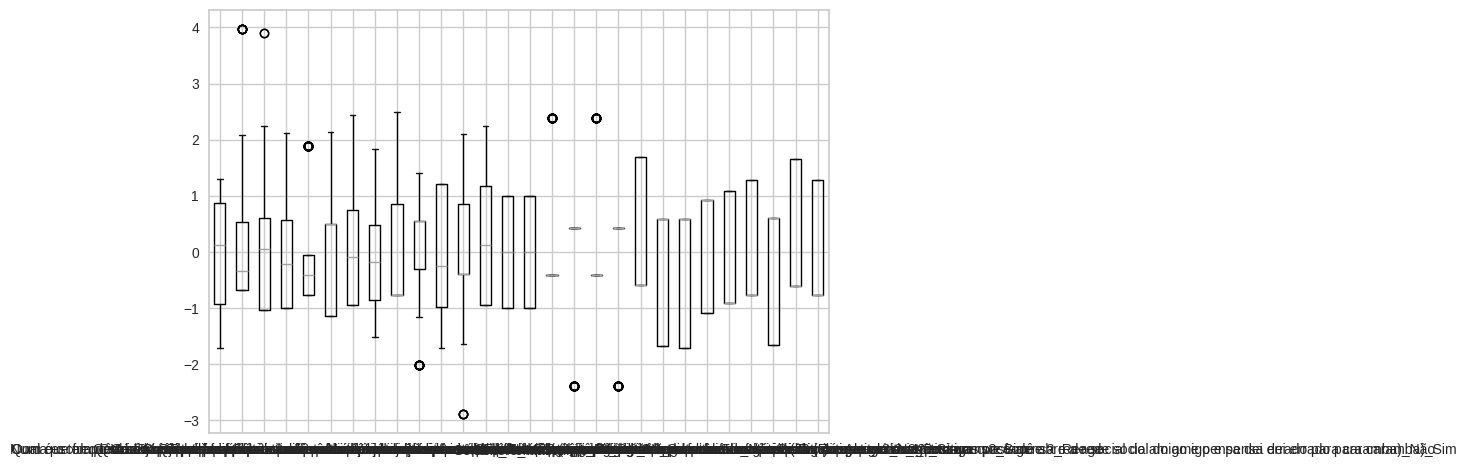

In [66]:
df_selecao_mineracao_insights_preprocessado_OHE_.boxplot()

In [67]:
# df_selecao_mineracao_insights_preprocessado_OHE.to_csv('df_selecao_mineracao_insights_preprocessado_OHE_padronizadas.csv', index=False)

## Modelagem

In [65]:
df_selecao_mineracao_insights_preprocessado_OHE_ = pd.read_csv('/content/df_selecao_mineracao_insights_preprocessado_OHE_padronizadas.csv')

In [66]:
df_selecao_mineracao_insights_preprocessado_OHE_

Qual é a sua idade?  Qual sua renda mensal bruta para custo de vida  \
0              -0.318449                                        0.526895   
1              -1.050338                                       -0.335767   
2               0.633006                                       -0.676699   
3              -0.391638                                       -0.335767   
4               1.218517                                       -0.676699   
..                   ...                                             ...   
183             0.779383                                       -0.335767   
184             1.291706                                        0.526895   
185            -0.977149                                       -0.335767   
186             0.340250                                       -0.676699   
187            -0.245261                                       -0.335767   

     Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                             0.058305                               
1                                             0.606375                               
2                                            -0.489765                               
3                                            -1.037835                               
4                                            -1.037835                               
..                                                 ...                               
183                                          -0.489765                               
184                                           1.702515                               
185                                          -0.489765                               
186                                          -1.037835                               
187                                          -1.037835                               

     Você acha difícil se concentrar nas coisas?      \
0                                           1.341434   
1                                           0.558236   
2                                          -1.008158   
3                                           0.558236   
4                                           2.124631   
..                                               ...   
183                                        -1.008158   
184                                        -0.224961   
185                                        -1.008158   
186                                        -0.224961   
187                                         0.558236   

     Pratica esporte com que frequência mensal?  \
0                                     -0.416277   
1                                     -0.416277   
2                                     -0.416277   
3                                     -0.770395   
4                                     -0.062159   
..                                          ...   
183                                   -0.770395   
184                                   -0.416277   
185                                   -0.770395   
186                                    1.885490   
187                                   -0.416277   

     Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                             0.488789                                                   
1                                             0.488789                                                   
2                                            -1.152147                                                   
3                                             0.488789                                                   
4                                             0.488789                                                   
..                                                 ...                                                   
183                            

### kmeans

In [69]:
# Encontrar o número ideal de clusters com Elbow
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selecao_mineracao_insights_preprocessado_OHE_)
    inertia.append(kmeans.inertia_)

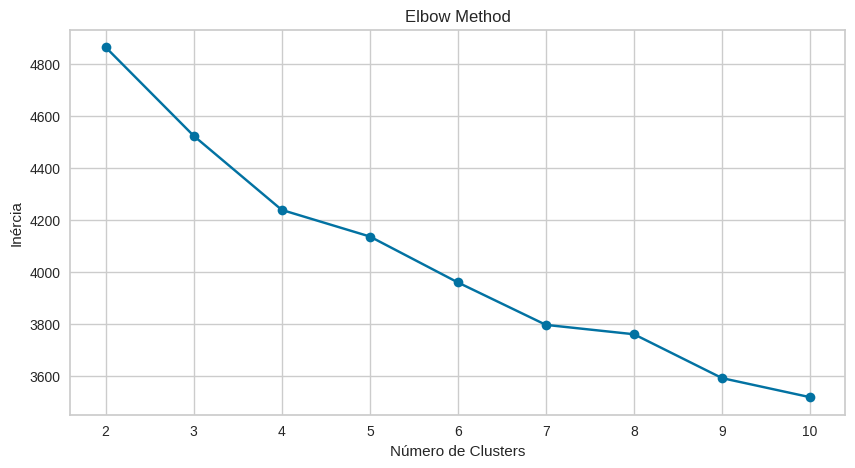

In [70]:

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title("Elbow Method")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  w

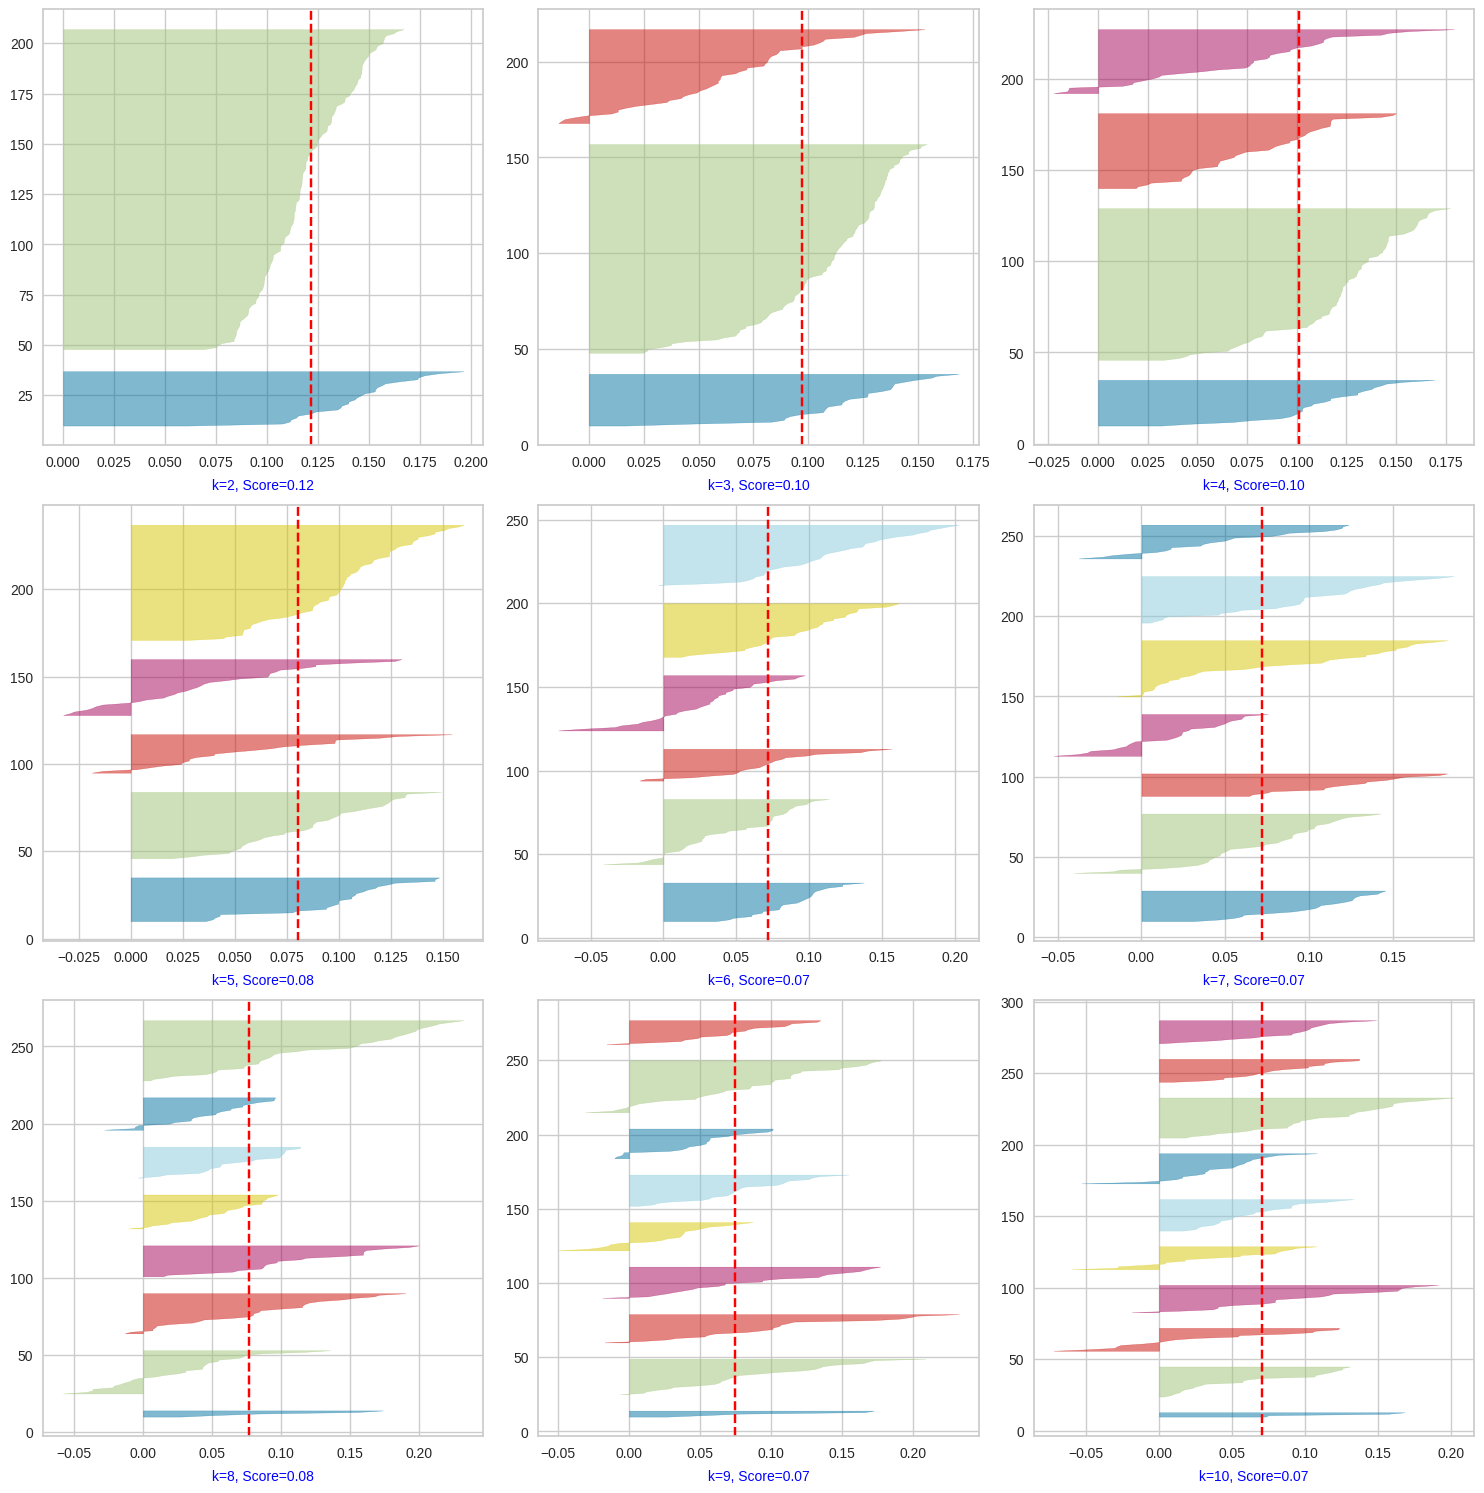

In [71]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 grid para visualizações de k=2 a k=10
axes = axes.flatten()  # Para iterar facilmente pelos eixos

#  visualizações de Silhouette Score para cada k
for i, k in enumerate(range(2, 11)):
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Calcula os rótulos para o Silhouette Score
    cluster_labels = kmeans.fit_predict(df_selecao_mineracao_insights_preprocessado_OHE_)
    sil_score = silhouette_score(df_selecao_mineracao_insights_preprocessado_OHE_, cluster_labels)


    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=axes[i])
    visualizer.fit(df_selecao_mineracao_insights_preprocessado_OHE_)

    # Adiciona o número de clusters e Silhouette Score como legenda
    axes[i].text(0.5, -0.1, f'k={k}, Score={sil_score:.2f}',
                 transform=axes[i].transAxes,
                 fontsize=10,
                 color='blue',
                 ha='center')

# Ajustando layout
plt.tight_layout()
plt.show();

In [72]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_selecao_mineracao_insights_preprocessado_OHE_)


df_selecao_mineracao_insights_preprocessado_OHE_['Cluster'] = cluster_labels

In [73]:
list(set(cluster_labels))

[0, 1, 2, 3]

In [74]:
kmeans.cluster_centers_

array([[-0.08199308, -0.09596169, -0.02601314,  0.07626881,  0.07404023,
         0.04699899, -0.06196387,  0.04666997, -0.14006458,  0.15569255,
        -0.02770998,  0.03368189, -0.05052993, -0.30769231,  0.30769231,
         2.39045722, -2.39045722,  0.0137911 , -0.0137911 , -0.15565665,
         0.15565665, -0.03190443,  0.30059962, -0.30059962, -0.4616596 ,
         0.25373634, -0.25373634, -0.4616596 ],
       [ 0.02745509,  0.03658995,  0.03220675,  0.0547524 ,  0.17813537,
         0.04925302, -0.00385729, -0.11369433,  0.13469393, -0.08078686,
         0.05164585, -0.0565496 ,  0.0498869 , -0.04761905,  0.04761905,
        -0.41833001,  0.41833001, -0.18426441,  0.18426441, -0.59373225,
         0.59373225, -0.26082091,  0.20133838, -0.20133838, -0.06687574,
         0.60192927, -0.60192927, -0.06687574],
       [ 0.01612824,  0.22322944, -0.18963112, -0.11307561, -0.18019837,
        -0.13632903, -0.23550886, -0.0258319 ,  0.10565442,  0.06172722,
         0.00830023,  0.0473

In [75]:
kmeans.cluster_centers_

array([[-0.08199308, -0.09596169, -0.02601314,  0.07626881,  0.07404023,
         0.04699899, -0.06196387,  0.04666997, -0.14006458,  0.15569255,
        -0.02770998,  0.03368189, -0.05052993, -0.30769231,  0.30769231,
         2.39045722, -2.39045722,  0.0137911 , -0.0137911 , -0.15565665,
         0.15565665, -0.03190443,  0.30059962, -0.30059962, -0.4616596 ,
         0.25373634, -0.25373634, -0.4616596 ],
       [ 0.02745509,  0.03658995,  0.03220675,  0.0547524 ,  0.17813537,
         0.04925302, -0.00385729, -0.11369433,  0.13469393, -0.08078686,
         0.05164585, -0.0565496 ,  0.0498869 , -0.04761905,  0.04761905,
        -0.41833001,  0.41833001, -0.18426441,  0.18426441, -0.59373225,
         0.59373225, -0.26082091,  0.20133838, -0.20133838, -0.06687574,
         0.60192927, -0.60192927, -0.06687574],
       [ 0.01612824,  0.22322944, -0.18963112, -0.11307561, -0.18019837,
        -0.13632903, -0.23550886, -0.0258319 ,  0.10565442,  0.06172722,
         0.00830023,  0.0473

In [76]:
list((set(cluster_labels)))

[0, 1, 2, 3]

In [78]:
df_selecao_mineracao_insights_preprocessado_OHE_

Qual é a sua idade?  Qual sua renda mensal bruta para custo de vida  \
0              -0.318449                                        0.526895   
1              -1.050338                                       -0.335767   
2               0.633006                                       -0.676699   
3              -0.391638                                       -0.335767   
4               1.218517                                       -0.676699   
..                   ...                                             ...   
183             0.779383                                       -0.335767   
184             1.291706                                        0.526895   
185            -0.977149                                       -0.335767   
186             0.340250                                       -0.676699   
187            -0.245261                                       -0.335767   

     Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                             0.058305                               
1                                             0.606375                               
2                                            -0.489765                               
3                                            -1.037835                               
4                                            -1.037835                               
..                                                 ...                               
183                                          -0.489765                               
184                                           1.702515                               
185                                          -0.489765                               
186                                          -1.037835                               
187                                          -1.037835                               

     Você acha difícil se concentrar nas coisas?      \
0                                           1.341434   
1                                           0.558236   
2                                          -1.008158   
3                                           0.558236   
4                                           2.124631   
..                                               ...   
183                                        -1.008158   
184                                        -0.224961   
185                                        -1.008158   
186                                        -0.224961   
187                                         0.558236   

     Pratica esporte com que frequência mensal?  \
0                                     -0.416277   
1                                     -0.416277   
2                                     -0.416277   
3                                     -0.770395   
4                                     -0.062159   
..                                          ...   
183                                   -0.770395   
184                                   -0.416277   
185                                   -0.770395   
186                                    1.885490   
187                                   -0.416277   

     Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                             0.488789                                                   
1                                             0.488789                                                   
2                                            -1.152147                                                   
3                                             0.488789                                                   
4                                             0.488789                                                   
..                                                 ...                                                   
183                            

In [79]:
df_selecao_mineracao_insights_preprocessado_OHE['Cluster'] = cluster_labels
df_selecao_mineracao_insights_preprocessado_OHE

Qual é a sua idade?  Qual sua renda mensal bruta para custo de vida  \
0                   38.0                                            3.33   
1                   28.0                                            1.66   
2                   51.0                                            1.00   
3                   37.0                                            1.66   
4                   59.0                                            1.00   
..                   ...                                             ...   
183                 53.0                                            1.66   
184                 60.0                                            3.33   
185                 29.0                                            1.66   
186                 47.0                                            1.00   
187                 39.0                                            1.66   

     Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                                  3.0                               
1                                                  4.0                               
2                                                  2.0                               
3                                                  1.0                               
4                                                  1.0                               
..                                                 ...                               
183                                                2.0                               
184                                                6.0                               
185                                                2.0                               
186                                                1.0                               
187                                                1.0                               

     Você acha difícil se concentrar nas coisas?      \
0                                                  4   
1                                                  3   
2                                                  1   
3                                                  3   
4                                                  5   
..                                               ...   
183                                                1   
184                                                2   
185                                                1   
186                                                2   
187                                                3   

     Pratica esporte com que frequência mensal?  \
0                                             4   
1                                             4   
2                                             4   
3                                             0   
4                                             8   
..                                          ...   
183                                           0   
184                                           4   
185                                           0   
186                                          30   
187                                           4   

     Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                                    3                                                   
1                                                    3                                                   
2                                                    1                                                   
3                                                    3                                                   
4                                                    3                                                   
..                                                 ...                                                   
183                            

In [85]:
matrizCorelacao = df_selecao_mineracao_insights_preprocessado_OHE_.corr()
matrizCorelacaoDesenpilhada= matrizCorelacao.unstack().reset_index()

In [88]:
matrizCorelacaoDesenpilhada

level_0                                            level_1  \
0    Qual é a sua idade?                                Qual é a sua idade?   
1    Qual é a sua idade?     Qual sua renda mensal bruta para custo de vida   
2    Qual é a sua idade?  Qual é o tempo médio que você passa nas redes ...   
3    Qual é a sua idade?    Você acha difícil se concentrar nas coisas?       
4    Qual é a sua idade?         Pratica esporte com que frequência mensal?   
..                   ...                                                ...   
836              Cluster  Como você reage quando vê comentários negativo...   
837              Cluster  Você já experimentou sentimentos de inveja ou ...   
838              Cluster  Você já experimentou sentimentos de inveja ou ...   
839              Cluster  Como você reage quando vê comentários negativo...   
840              Cluster                                            Cluster   

            0  
0    1.000000  
1    0.023933  
2    0.041184  
3   -0.038100  
4    0.012602  
..        ...  
836  0.204499  
837 -0.285382  
838  0.285382  
839  0.204499  
840  1.000000  

[841 rows x 3 columns]

In [81]:
matrizCorelacao.keys()

Index(['Qual é a sua idade?', 'Qual sua renda mensal bruta para custo de vida',
       'Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?',
       'Você acha difícil se concentrar nas coisas?    ',
       'Pratica esporte com que frequência mensal?',
       'Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?',
       'Com que frequência você se sente deprimido ou está deprimido?    ',
       'Com que frequência você usa mídias sociais sem um propósito específico?',
       'Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais?',
       'Como você se sente quando vê publicações de pessoas mostrando vidas aparentemente perfeitas?',
       'Como você se sente ao receber poucos "likes" em suas postagens?',
       'Qual o impacto que você acredita que as redes sociais causam em você? (sendo 1 muito negativo e 5 muito positivo )',
       'Com que frequênc

\[
\begin{array}{|c|c|}
\hline
\textbf{Valor da Correlação} & \textbf{Interpretação} \\
\hline
-1.0                         & Correlação\   linear\  negativa\  perfeita \\
\hline\
-0.7 \text{ a } -1.0         & Correlação\  linear\  negativaa  forte \\
\hline
-0.3 \text{ a } -0.7         & Correlação\ linear\ negativa\ moderada \\
\hline
-0.1 \text{ a } -0.3         & Correlação\ linear\ negativa\ fraca \\
\hline
-0.1 \text{ a } 0.1          & Nenhuma\ ou\ correlação\ muito\ fraca \\
\hline
0.1 \text{ a } 0.3           & Correlação\ linear\ positiva\ fraca \\
\hline
0.3 \text{ a } 0.7           & Correlação\ linear\ positiva\ moderada \\
\hline
0.7 \text{ a } 1.0           & Correlação\ linear\ positiva\ forte \\
\hline
1.0                          & Correlação\ linear\ positiva\ perfeita \\
\hline
\end{array}
\]

In [91]:
matrizCorelacaoDesenpilhada['Cluster']

0      Qual é a sua idade?
1      Qual é a sua idade?
2      Qual é a sua idade?
3      Qual é a sua idade?
4      Qual é a sua idade?
              ...         
836                Cluster
837                Cluster
838                Cluster
839                Cluster
840                Cluster
Name: level_0, Length: 841, dtype: object

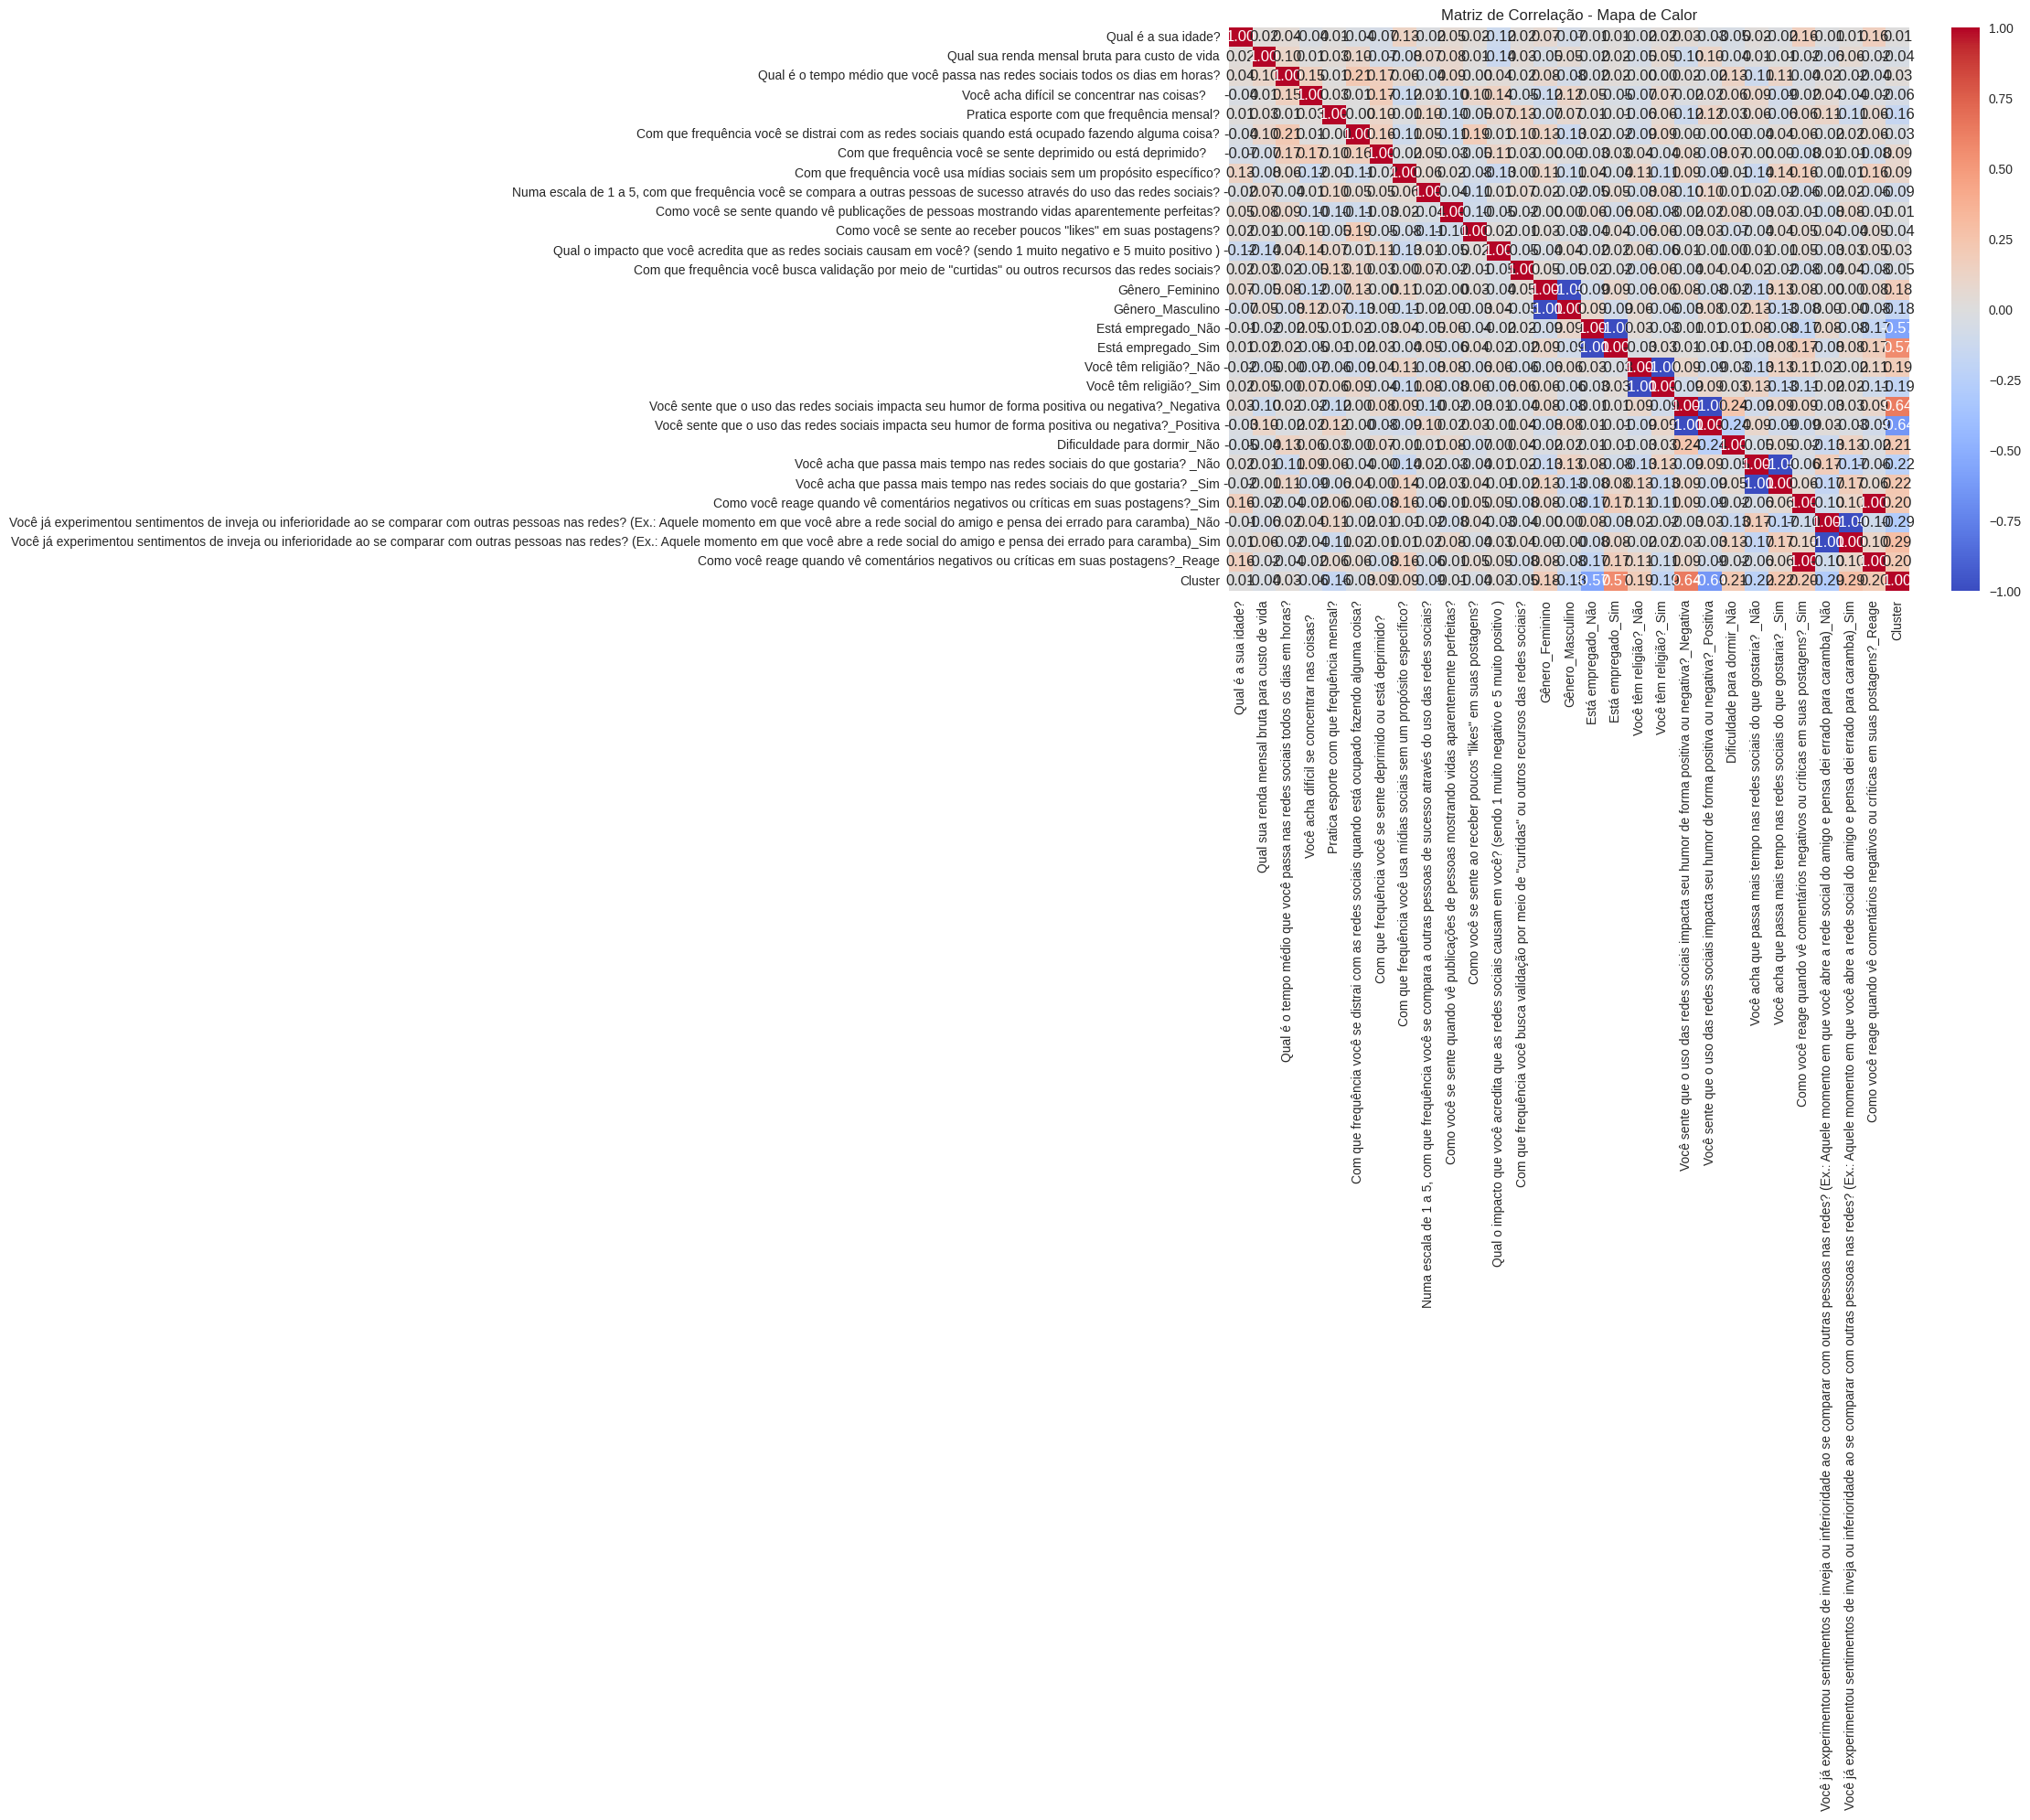

In [92]:
# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_selecao_mineracao_insights_preprocessado_OHE_.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação - Mapa de Calor")
plt.show()
# fig = px.imshow(
#     matrizCorelacao,
#     text_auto=True,  # Adiciona os valores na célula
#     color_continuous_scale='viridis',  # Substituímos por um colorscale suportado
#     title="Matriz de Correlação - Mapa de Calor"
# )
# fig.update_layout(
#     width=800,
#     height=600,
#     xaxis_title="Features",
#     yaxis_title="Features"
# )

# # Exibir o gráfico
# fig.show()

In [93]:
fig = px.scatter(
    df_selecao_mineracao_insights_preprocessado_OHE,
    x='Qual é a sua idade?',
    y='Como você reage quando vê comentários negativos ou críticas em suas postagens?_Reage',             # Nome corrigido
    # size='Qual é a sua idade?',
    color='Cluster',
    title='Gráfico de Bolhas',
    labels={'x': 'Eixo X', 'y': 'Eixo Y', 'Cluster': 'Cluster'}
)

fig.show()

### DBSCAN

In [110]:
def silhouette_dbscan(params, X):
    # Extrair os parâmetros de eps e min_samples
    eps = params['eps']
    min_samples = params['min_samples']

    # Instanciar o DBSCAN com os parâmetros
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Ajustar o modelo
    labels = dbscan.fit_predict(X)

    # Calcular o índice de silhueta (somente para os clusters, ignorando os pontos de ruído (-1))
    if len(set(labels)) > 1:  # Para garantir que pelo menos 1 cluster foi encontrado
        return silhouette_score(X, labels)
    else:
        return -1  # Retorna -1 se não houver clusters, evitando erros na avaliação

# Definindo o Grid de Parâmetros

In [115]:
# Definindo o Grid de Parâmetros
param_grid = {
    'eps': np.arange(0.0001, 2.0, 0.00001),  # Valor de eps de 0.1 a 2.0
    'min_samples': np.arange(3, 15)   # Número mínimo de pontos de 3 a 14
}

In [131]:
# Realizando o Grid Search
best_score = -1
best_params = None
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        score = silhouette_dbscan({'eps': eps, 'min_samples': min_samples}, df_selecao_mineracao_insights_preprocessado_OHE_)
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

KeyboardInterrupt: 

In [114]:
print(f"Melhores parâmetros: eps={best_params}, min_samples={best_params}")
print(f"Índice de Silhueta: {best_score}")

Melhores parâmetros: eps=None, min_samples=None
Índice de Silhueta: -1


### PCA

In [136]:
df_selecao_mineracao_insights_preprocessado_OHE_.shape

(188, 29)

In [140]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(df_selecao_mineracao_insights_preprocessado_OHE_)

# Exibir as primeiras 5 amostras do resultado PCA
print(X_pca[:5, :])

[[-2.63299061 -2.36405351 -2.41676437  0.12192084 -1.80382781  1.44943476
   1.90675448 -0.07618791 -0.19206375 -0.45062885  0.8680155   1.03516846
   2.61921396  0.41528994 -0.03566855]
 [-1.04238801  0.38877417  0.13250082  1.04600935 -0.68725214 -1.96527169
   1.40139677 -1.38560478  1.23147379  0.24068166  0.47037368 -1.15838525
  -1.33286795  0.18304871  0.81467877]
 [-1.21984297  0.93618335  1.64135758 -2.31088056  0.1575792   0.73201751
  -1.52354115 -1.72317136 -0.19490049  0.05921409  1.91383783  0.93468818
  -0.3585682  -0.58526377  0.31457921]
 [ 1.84951052 -0.20570259  1.01528057 -0.83736868 -2.9997967   2.3664255
   0.29820763 -0.1785581   1.30412413 -0.84986593  0.42777143  0.07028284
   1.19851583 -0.05458511  0.2942724 ]
 [-1.62360331 -2.41196805 -2.06796601  1.17643671 -0.44123777  1.34944923
   2.22220121 -2.29139694  0.54064457 -0.75552592  1.21556753  1.28084735
   0.43291859  1.71429494  0.0292902 ]]


<ipython-input-141-d9ccd6ba48ff>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



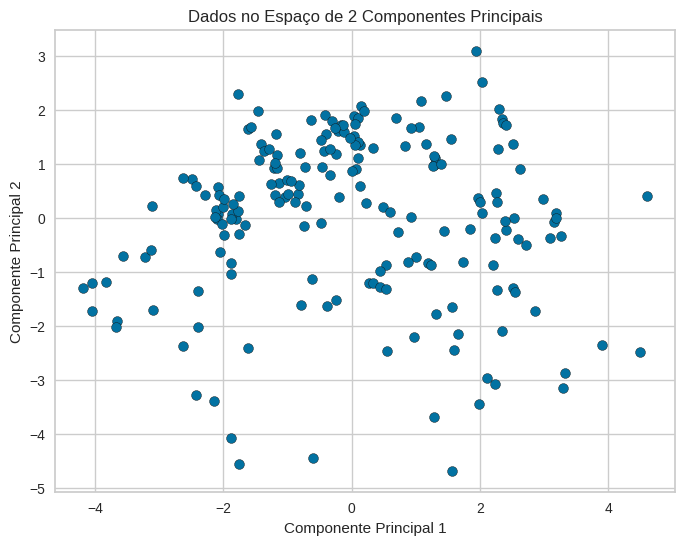

In [141]:
#Visualizar os dados projetados nas 2 primeiras componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, edgecolor='k', cmap='viridis')
plt.title("Dados no Espaço de 2 Componentes Principais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [142]:
# Variância explicada por cada componente
print("Variância explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Variância total explicada pelas 2 primeiras componentes
print(f"Variância total explicada pelas 2 componentes principais: {sum(pca.explained_variance_ratio_):.2f}")


Variância explicada por cada componente principal:
[0.12414664 0.08166828 0.07415337 0.07353278 0.07161028 0.06214143
 0.05514501 0.04992288 0.04573857 0.04339567 0.03919082 0.03445982
 0.03362808 0.03054434 0.02961686]
Variância total explicada pelas 2 componentes principais: 0.85


### RL

In [68]:
df_selecao_mineracao_insights_preprocessado_OHE_.keys()

Index(['Qual é a sua idade?', 'Qual sua renda mensal bruta para custo de vida',
       'Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?',
       'Você acha difícil se concentrar nas coisas?    ',
       'Pratica esporte com que frequência mensal?',
       'Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?',
       'Com que frequência você se sente deprimido ou está deprimido?    ',
       'Com que frequência você usa mídias sociais sem um propósito específico?',
       'Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais?',
       'Como você se sente quando vê publicações de pessoas mostrando vidas aparentemente perfeitas?',
       'Como você se sente ao receber poucos "likes" em suas postagens?',
       'Qual o impacto que você acredita que as redes sociais causam em você? (sendo 1 muito negativo e 5 muito positivo )',
       'Com que frequênc

In [82]:
df_selecao_mineracao_insights

Qual é a sua idade?     Gênero Está empregado  \
0                   38.0  Masculino            Não   
1                   28.0  Masculino            Sim   
2                   51.0  Masculino            Sim   
3                   37.0  Masculino            Sim   
4                   59.0  Masculino            Não   
..                   ...        ...            ...   
183                 53.0   Feminino            Sim   
184                 60.0   Feminino            Sim   
185                 29.0   Feminino            Sim   
186                 47.0   Feminino            Não   
187                 39.0   Feminino            Sim   

    Qual sua renda mensal bruta para custo de vida Você têm religião?  \
0                                       Atè 10 mil                Sim   
1                                        Até 5 mil                Sim   
2                                        Até 3 mil                Sim   
3                                        Até 5 mil                Sim   
4                                        Até 3 mil                Sim   
..                                             ...                ...   
183                                      Até 5 mil                Sim   
184                                     Atè 10 mil                Sim   
185                                      Até 5 mil                Sim   
186                                      Até 3 mil                Sim   
187                                      Até 5 mil                Sim   

     Qual é o tempo médio que você passa nas redes sociais todos os dias em horas?  \
0                                                  3.0                               
1                                                  4.0                               
2                                                  2.0                               
3                                                  1.0                               
4                                                  1.0                               
..                                                 ...                               
183                                                2.0                               
184                                                6.0                               
185                                                2.0                               
186                                                1.0                               
187                                                1.0                               

     Você acha difícil se concentrar nas coisas?      \
0                                                  4   
1                                                  3   
2                                                  1   
3                                                  3   
4                                                  5   
..                                               ...   
183                                                1   
184                                                2   
185                                                1   
186                                                2   
187                                                3   

    Pratica esporte com que frequência mensal?  \
0                                  Até 4 vezes   
1                                  Até 4 vezes   
2                                  Até 4 vezes   
3                                      Nenhuma   
4                                  Até 8 vezes   
..                                         ...   
183                                    Nenhuma   
184                                Até 4 vezes   
185                                    Nenhuma   
186                              Todos os dias   
187                                Até 4 vezes   

     Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa?  \
0                                                    3            

In [84]:
df_selecao_mineracao_insights['Qual o impacto que você acredita que as redes sociais causam em você? (sendo 1 muito negativo e 5 muito positivo )']

0      3
1      4
2      1
3      4
4      3
      ..
183    3
184    3
185    4
186    2
187    4
Name: Qual o impacto que você acredita que as redes sociais causam em você? (sendo 1 muito negativo e 5 muito positivo ), Length: 188, dtype: int64

In [85]:
# 2. Dividir os dados em treino e teste
X = df_selecao_mineracao_insights_preprocessado_OHE_.drop('Qual o impacto que você acredita que as redes sociais causam em você? (sendo 1 muito negativo e 5 muito positivo )', axis=1)  # Features (entradas)
y = df_selecao_mineracao_insights['Qual o impacto que você acredita que as redes sociais causam em você? (sendo 1 muito negativo e 5 muito positivo )']               # Rótulos (saídas)

# Dividir em treino e teste (80% para treino, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criar o modelo de Regressão Logística
model = LogisticRegression(max_iter=200)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# 4. Fazer previsões com o modelo
y_pred = model.predict(X_test)

# 5. Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

# # Visualizando a matriz de confusão
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
# plt.xlabel('Predito')
# plt.ylabel('Real')
# plt.title('Matriz de Confusão')
# plt.show()

Accuracy: 0.45
Matriz de Confusão:
[[ 0  0  0  0  0]
 [ 0  1  2  0  0]
 [ 1  1 14  6  2]
 [ 1  0  5  2  1]
 [ 0  0  2  0  0]]


In [86]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularização
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Algoritmos para otimização
    'penalty': ['l2', 'none'],  # Tipo de penalização
    'multi_class': ['ovr', 'multinomial']  # Estratégia multiclasse
}

In [142]:
rl = LogisticRegression(max_iter=200)

In [93]:
grid_search = GridSearchCV(estimator=rl, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)


In [94]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
175 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             verbose=1)

In [104]:
print(f'Melhores parâmetros encontrados: {grid_search.best_params_}')

Melhores parâmetros encontrados: {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}


In [105]:
y_pred = grid_search.predict(X_test)


In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo otimizado: {accuracy:.2f}')

Acurácia do modelo otimizado: 0.63


In [145]:
rl = LogisticRegression(max_iter=200, C=0.001, penalty='l2',multi_class='ovr' ,solver='lbfgs')

In [157]:
rl.fit(X_train, y_train)
scores = cross_val_score(rl, X_train, y_train,cv=50,scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=50.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) inste

In [158]:
scores

array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])

In [159]:
y_pred =rl.predict(X_test)

In [161]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [163]:
len(rl.coef_)

5

In [166]:
rl.coef_

array([[ 3.80608631e-03,  6.42484172e-03,  5.57535160e-05,
        -1.67676561e-03, -1.57287715e-03, -6.51425049e-04,
        -1.76283678e-03, -1.36226246e-03, -7.32211344e-04,
        -1.00027019e-03, -1.73777585e-03,  3.74918675e-03,
        -3.51603231e-06,  3.51603231e-06, -1.63434108e-03,
         1.63434108e-03, -1.62917000e-03,  1.62917000e-03,
        -1.93431387e-05,  1.93431387e-05, -2.68660110e-03,
         1.67261244e-03, -1.67261244e-03, -1.12279319e-03,
        -2.99137664e-05,  2.99137664e-05, -1.12279319e-03],
       [ 1.55516083e-03, -2.07964858e-03, -2.02611252e-03,
        -5.08396313e-03, -1.31895469e-05, -2.44157189e-03,
        -3.53933828e-03,  5.07992300e-03,  2.61552714e-03,
         3.67744938e-03, -2.95618339e-03, -1.90499526e-03,
         2.95873419e-03, -2.95873419e-03,  4.63839155e-03,
        -4.63839155e-03, -8.83635498e-04,  8.83635498e-04,
        -2.86573567e-03,  2.86573567e-03, -2.98815651e-04,
         2.24374536e-03, -2.24374536e-03,  1.06215740e-

In [169]:
rl.classes_

array([1, 2, 3, 4, 5])